In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import math
import pprint
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('MSFT_sent_news.csv')

In [3]:
data['date']= data['publication_date']
#data['date']= pd.to_datetime(data.publication_date,format='%Y-%m-%d')
#data =data.set_index['date']
#data = date.drop(['publication_date'], axis=1)

In [4]:
data['date']= pd.to_datetime(data.publication_date,format='%Y-%m-%d')

In [5]:
data = data.set_index('date')

In [6]:
data = data.drop(['publication_date'], axis=1)

In [7]:
data[:100]

,compound,headline,neg,neu,pos,label
date,,,,,,
2016-04-22 01:05:08,0.0772,Intel and Microsoft face different challenges ...,0.000,0.874,0.126,0
2016-04-22 02:18:28,0.2500,"Microsoft revenue, profit misses estimates",0.244,0.385,0.372,1
2016-04-27 07:36:08,0.3612,Is India ready for the 'thinnest' laptop age?,0.000,0.737,0.263,1
2016-05-11 06:32:13,0.3612,"Are we ready for chatbots, the next technology...",0.000,0.762,0.238,1
2016-05-25 21:13:59,-0.5994,"Microsoft to cut 1,850 jobs at struggling smar...",0.412,0.588,0.000,-1
2016-05-30 07:50:04,0.0000,Microsoft seeks to empower every Indian: Satya...,0.000,1.000,0.000,0
2016-05-31 11:26:04,0.0000,Newgen Software's unique app now on Windows pl...,0.000,1.000,0.000,0
2016-06-13 10:12:03,0.0000,Microsoft launches its online store with Tata ...,0.000,1.000,0.000,0
2016-06-14 00:19:02,0.0000,Microsoft to buy LinkedIn for $26.2 billion in...,0.000,1.000,0.000,0


In [8]:
news_daily = data.resample('D').mean()

In [9]:
# Resample the full dataframe to monthly timeframe
#news_daily = data.resample('D').mean()



In [10]:
news_daily.fillna(0, inplace=True)
news_daily.head()

,compound,neg,neu,pos,label
date,,,,,
2016-04-22,0.1636,0.122,0.6295,0.249,0.5
2016-04-23,0.0000,0.000,0.0000,0.000,0.0
2016-04-24,0.0000,0.000,0.0000,0.000,0.0
2016-04-25,0.0000,0.000,0.0000,0.000,0.0
2016-04-26,0.0000,0.000,0.0000,0.000,0.0


In [11]:
news_daily=news_daily.loc['2016-07-01':'2019-07-01']
news_daily.head()

,compound,neg,neu,pos,label
date,,,,,
2016-07-01,0.0,0.0,0.0,0.0,0.0
2016-07-02,0.0,0.0,0.0,0.0,0.0
2016-07-03,0.0,0.0,0.0,0.0,0.0
2016-07-04,0.0,0.0,0.0,0.0,0.0
2016-07-05,0.0,0.0,0.0,0.0,0.0


In [12]:
news_daily.describe()

,compound,neg,neu,pos,label
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,0.079550,0.045314,0.779814,0.097318,0.187600
std,0.127200,0.046787,0.234509,0.060783,0.270739
min,-0.668600,0.000000,0.000000,0.000000,-1.000000
25%,0.009593,0.014643,0.803656,0.069717,0.000000
50%,0.079774,0.038062,0.844356,0.095830,0.188345
75%,0.142619,0.062661,0.878601,0.126721,0.333333
max,0.844200,0.417000,1.000000,0.558000,1.000000


### Fundamental Data

In [13]:
fund = pd.read_csv('MSFT_Fund.csv')
fund.head()

,date,marketcap,pricetobook,pricetoearnings,dividendyield,earningsyield,nopat,freecashflow,roe,ebitdagrowth,...,ebitda,totalassets,totalliabilities,debt,netincome,netcashfromoperatingactivities,netcashfrominvestingactivities,netcashfromfinancingactivities,longterminvestments,one_yr_monthly_beta
0,01/07/2019,1.050000e+12,10.2456,26.7185,0.016417,0.037427,3.422450e+10,2.158950e+10,0.401211,0.209991,...,5.304600e+10,2.630000e+11,1.680000e+11,7.310000e+10,3.492600e+10,4.749500e+10,-1.118600e+10,-3.424000e+10,2.403000e+09,1.1005
1,28/06/2019,1.030000e+12,10.8992,29.6038,0.016627,0.033779,3.422450e+10,2.158950e+10,0.401211,0.209991,...,5.304600e+10,2.630000e+11,1.680000e+11,7.310000e+10,3.492600e+10,4.749500e+10,-1.118600e+10,-3.424000e+10,2.403000e+09,1.1059
2,27/06/2019,1.040000e+12,10.9147,29.6458,0.016604,0.033732,3.422450e+10,2.158950e+10,0.401211,0.209991,...,5.304600e+10,2.630000e+11,1.680000e+11,7.310000e+10,3.492600e+10,4.749500e+10,-1.118600e+10,-3.424000e+10,2.403000e+09,1.1059
3,26/06/2019,1.030000e+12,10.8968,29.5972,0.016631,0.033787,3.422450e+10,2.158950e+10,0.401211,0.209991,...,5.304600e+10,2.630000e+11,1.680000e+11,7.310000e+10,3.492600e+10,4.749500e+10,-1.118600e+10,-3.424000e+10,2.403000e+09,1.1059
4,25/06/2019,1.030000e+12,10.8561,29.4867,0.016693,0.033914,3.422450e+10,2.158950e+10,0.401211,0.209991,...,5.304600e+10,2.630000e+11,1.680000e+11,7.310000e+10,3.492600e+10,4.749500e+10,-1.118600e+10,-3.424000e+10,2.403000e+09,1.1059


In [14]:
fund['date']= pd.to_datetime(fund.date,format='%d/%m/%Y')

In [15]:

fund.index =fund['date']

In [16]:
fund=fund.loc['2016/07/01':'2019/07/01']

In [17]:
fund.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2019-07-01 to 2016-07-01
Data columns (total 35 columns):
date                              754 non-null datetime64[ns]
marketcap                         754 non-null float64
pricetobook                       754 non-null float64
pricetoearnings                   754 non-null float64
dividendyield                     754 non-null float64
earningsyield                     754 non-null float64
nopat                             754 non-null float64
freecashflow                      754 non-null float64
roe                               754 non-null float64
ebitdagrowth                      754 non-null float64
ebitdamargin                      754 non-null float64
cashdividendspershare             754 non-null float64
bookvaluepershare                 754 non-null float64
capex                             754 non-null float64
currentratio                      754 non-null float64
debttoequity                      754 non-nu

### Price analysis

In [18]:
df_price = pd.read_csv('MSFT_price.csv')

In [19]:
df_price['date']= df_price['date']
df_price['date']=pd.to_datetime(df_price.date,format='%Y-%m-%d')
df_price.index =df_price['date']

In [20]:
#df_price = df_price.drop(['date'], axis=1)

In [21]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,intraperiod,low,open,volume
date,,,,,,,,,,,,,,
2019-08-19,0,138.41,138.550000,136.885000,137.855000,24370543.0,138.41,2019-08-19,daily,138.55,False,136.885,137.855,24370543.0
2019-08-16,1,136.13,136.460000,134.720000,134.880000,25026151.0,136.13,2019-08-16,daily,136.46,False,134.720,134.880,25026151.0
2019-08-15,2,133.68,134.580000,132.250000,134.390000,28125416.0,133.68,2019-08-15,daily,134.58,False,132.250,134.390,28125416.0
2019-08-14,3,133.98,136.920000,133.670000,136.360000,32527251.0,133.98,2019-08-14,daily,136.92,False,133.670,136.360,32527251.0
2019-08-13,4,138.14,138.339336,134.551948,135.598463,25496593.0,138.60,2019-08-13,daily,138.80,False,135.000,136.050,25496593.0


In [22]:
df_price=df_price[::-1]

In [23]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1200 entries, 2014-11-11 to 2019-08-19
Data columns (total 14 columns):
Unnamed: 0     1200 non-null int64
adj_close      1200 non-null float64
adj_high       1200 non-null float64
adj_low        1200 non-null float64
adj_open       1200 non-null float64
adj_volume     1200 non-null float64
close          1200 non-null float64
date           1200 non-null datetime64[ns]
frequency      1200 non-null object
high           1200 non-null float64
intraperiod    1200 non-null bool
low            1200 non-null float64
open           1200 non-null float64
volume         1200 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(10), int64(1), object(1)
memory usage: 132.4+ KB


In [24]:
import talib
for n in [14, 30, 50, 200]:

    # Create the moving average indicator and divide by Adj_Close
    df_price['ma' + str(n)] = talib.SMA(df_price['adj_close'].values,
                              timeperiod=n) / df_price['adj_close']
    # Create the RSI indicator
    df_price['rsi' + str(n)] = talib.RSI(df_price['adj_close'].values, timeperiod=n)

In [25]:
df_price=df_price.loc['2016-07-01':'2019-07-01']

In [26]:
df_price.ma200

date
2016-07-01    1.003617
2016-07-05    1.004186
2016-07-06    1.000938
2016-07-07    1.001734
2016-07-08    0.985002
2016-07-11    0.980486
2016-07-12    0.970020
2016-07-13    0.965561
2016-07-14    0.962484
2016-07-15    0.964239
2016-07-18    0.960577
2016-07-19    0.977203
2016-07-20    0.928924
2016-07-21    0.931663
2016-07-22    0.919935
2016-07-25    0.918300
2016-07-26    0.918721
2016-07-27    0.928935
2016-07-28    0.929510
2016-07-29    0.922752
2016-08-01    0.925342
2016-08-02    0.926274
2016-08-03    0.920849
2016-08-04    0.915047
2016-08-05    0.907012
2016-08-08    0.906469
2016-08-09    0.905247
2016-08-10    0.908593
2016-08-11    0.904673
2016-08-12    0.910756
                ...   
2019-05-20    0.875454
2019-05-21    0.871592
2019-05-22    0.867172
2019-05-23    0.878195
2019-05-24    0.878534
2019-05-28    0.879822
2019-05-29    0.889094
2019-05-30    0.884242
2019-05-31    0.899594
2019-06-03    0.928921
2019-06-04    0.904563
2019-06-05    0.886144
2019-0

In [27]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2016-07-01 to 2019-07-01
Data columns (total 22 columns):
Unnamed: 0     754 non-null int64
adj_close      754 non-null float64
adj_high       754 non-null float64
adj_low        754 non-null float64
adj_open       754 non-null float64
adj_volume     754 non-null float64
close          754 non-null float64
date           754 non-null datetime64[ns]
frequency      754 non-null object
high           754 non-null float64
intraperiod    754 non-null bool
low            754 non-null float64
open           754 non-null float64
volume         754 non-null float64
ma14           754 non-null float64
rsi14          754 non-null float64
ma30           754 non-null float64
rsi30          754 non-null float64
ma50           754 non-null float64
rsi50          754 non-null float64
ma200          754 non-null float64
rsi200         754 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(18), int64(1), object(1)
memory usage: 

In [28]:
#df.join(other, lsuffix='_caller', rsuffix='_other')
df_price = df_price.join(news_daily['compound'])
#full_df = pd.merge(df_price,news_daily['compound'],how='left')

In [29]:
df_price=pd.merge(df_price,fund,how='outer',on='date')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [30]:
df_price.index =df_price['date']

In [31]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,...,ebitda,totalassets,totalliabilities,debt,netincome,netcashfromoperatingactivities,netcashfrominvestingactivities,netcashfromfinancingactivities,longterminvestments,one_yr_monthly_beta
date,,,,,,,,,,,,,,,,,,,,,
2016-07-01,787,48.013624,48.539183,47.929159,47.985469,21400392.0,51.16,2016-07-01,daily,51.72,...,3.226100e+10,1.930000e+11,1.210000e+11,5.346100e+10,2.053900e+10,3.332500e+10,-2.395000e+10,-8.393000e+09,1.043100e+10,1.5484
2016-07-05,786,48.023009,48.126244,47.619454,47.703919,24806351.0,51.17,2016-07-05,daily,51.28,...,3.226100e+10,1.930000e+11,1.210000e+11,5.346100e+10,2.053900e+10,3.332500e+10,-2.395000e+10,-8.393000e+09,1.043100e+10,1.5484
2016-07-06,785,48.220094,48.370254,47.290979,47.656994,28167461.0,51.38,2016-07-06,daily,51.54,...,3.226100e+10,1.930000e+11,1.210000e+11,5.346100e+10,2.053900e+10,3.332500e+10,-2.395000e+10,-8.393000e+09,1.043100e+10,1.5484
2016-07-07,784,48.220094,48.435949,47.929159,48.257634,19585194.0,51.38,2016-07-07,daily,51.61,...,3.226100e+10,1.930000e+11,1.210000e+11,5.346100e+10,2.053900e+10,3.332500e+10,-2.395000e+10,-8.393000e+09,1.043100e+10,1.5484
2016-07-08,783,49.083513,49.139823,48.379639,48.548568,28391026.0,52.30,2016-07-08,daily,52.36,...,3.226100e+10,1.930000e+11,1.210000e+11,5.346100e+10,2.053900e+10,3.332500e+10,-2.395000e+10,-8.393000e+09,1.043100e+10,1.5484


In [32]:
df_price['Unnamed: 0'].drop

<bound method Series.drop of date
2016-07-01    787
2016-07-05    786
2016-07-06    785
2016-07-07    784
2016-07-08    783
2016-07-11    782
2016-07-12    781
2016-07-13    780
2016-07-14    779
2016-07-15    778
2016-07-18    777
2016-07-19    776
2016-07-20    775
2016-07-21    774
2016-07-22    773
2016-07-25    772
2016-07-26    771
2016-07-27    770
2016-07-28    769
2016-07-29    768
2016-08-01    767
2016-08-02    766
2016-08-03    765
2016-08-04    764
2016-08-05    763
2016-08-08    762
2016-08-09    761
2016-08-10    760
2016-08-11    759
2016-08-12    758
             ... 
2019-05-20     63
2019-05-21     62
2019-05-22     61
2019-05-23     60
2019-05-24     59
2019-05-28     58
2019-05-29     57
2019-05-30     56
2019-05-31     55
2019-06-03     54
2019-06-04     53
2019-06-05     52
2019-06-06     51
2019-06-07     50
2019-06-10     49
2019-06-11     48
2019-06-12     47
2019-06-13     46
2019-06-14     45
2019-06-17     44
2019-06-18     43
2019-06-19     42
2019-06-20  

In [33]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2016-07-01 to 2019-07-01
Data columns (total 57 columns):
Unnamed: 0                        754 non-null int64
adj_close                         754 non-null float64
adj_high                          754 non-null float64
adj_low                           754 non-null float64
adj_open                          754 non-null float64
adj_volume                        754 non-null float64
close                             754 non-null float64
date                              754 non-null datetime64[ns]
frequency                         754 non-null object
high                              754 non-null float64
intraperiod                       754 non-null bool
low                               754 non-null float64
open                              754 non-null float64
volume                            754 non-null float64
ma14                              754 non-null float64
rsi14                             754 non-null flo

In [34]:
df_price['ebitda'] = df_price['ebitda'].astype(float)

In [35]:
df_price.columns

Index(['Unnamed: 0', 'adj_close', 'adj_high', 'adj_low', 'adj_open',
       'adj_volume', 'close', 'date', 'frequency', 'high', 'intraperiod',
       'low', 'open', 'volume', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50',
       'rsi50', 'ma200', 'rsi200', 'compound', 'marketcap', 'pricetobook',
       'pricetoearnings', 'dividendyield', 'earningsyield', 'nopat',
       'freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin',
       'cashdividendspershare', 'bookvaluepershare', 'capex', 'currentratio',
       'debttoequity', 'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth',
       'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps',
       'operatingrevenue', 'ebitda', 'totalassets', 'totalliabilities', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments', 'one_yr_monthly_beta'],
      dtype='object')

In [36]:
fundamentals=['marketcap', 'pricetobook','pricetoearnings', 'dividendyield', 'earningsyield', 'nopat','freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin',
       'cashdividendspershare', 'bookvaluepershare', 'capex', 'currentratio',
       'debttoequity', 'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth',
       'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps',
       'operatingrevenue', 'ebitda', 'totalassets', 'totalliabilities', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments','one_yr_monthly_beta']

In [37]:
for column in fundamentals:
    df_price[column] = df_price[column].astype(float)

In [38]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,...,ebitda,totalassets,totalliabilities,debt,netincome,netcashfromoperatingactivities,netcashfrominvestingactivities,netcashfromfinancingactivities,longterminvestments,one_yr_monthly_beta
date,,,,,,,,,,,,,,,,,,,,,
2016-07-01,787,48.013624,48.539183,47.929159,47.985469,21400392.0,51.16,2016-07-01,daily,51.72,...,3.226100e+10,1.930000e+11,1.210000e+11,5.346100e+10,2.053900e+10,3.332500e+10,-2.395000e+10,-8.393000e+09,1.043100e+10,1.5484
2016-07-05,786,48.023009,48.126244,47.619454,47.703919,24806351.0,51.17,2016-07-05,daily,51.28,...,3.226100e+10,1.930000e+11,1.210000e+11,5.346100e+10,2.053900e+10,3.332500e+10,-2.395000e+10,-8.393000e+09,1.043100e+10,1.5484
2016-07-06,785,48.220094,48.370254,47.290979,47.656994,28167461.0,51.38,2016-07-06,daily,51.54,...,3.226100e+10,1.930000e+11,1.210000e+11,5.346100e+10,2.053900e+10,3.332500e+10,-2.395000e+10,-8.393000e+09,1.043100e+10,1.5484
2016-07-07,784,48.220094,48.435949,47.929159,48.257634,19585194.0,51.38,2016-07-07,daily,51.61,...,3.226100e+10,1.930000e+11,1.210000e+11,5.346100e+10,2.053900e+10,3.332500e+10,-2.395000e+10,-8.393000e+09,1.043100e+10,1.5484
2016-07-08,783,49.083513,49.139823,48.379639,48.548568,28391026.0,52.30,2016-07-08,daily,52.36,...,3.226100e+10,1.930000e+11,1.210000e+11,5.346100e+10,2.053900e+10,3.332500e+10,-2.395000e+10,-8.393000e+09,1.043100e+10,1.5484


### EDA

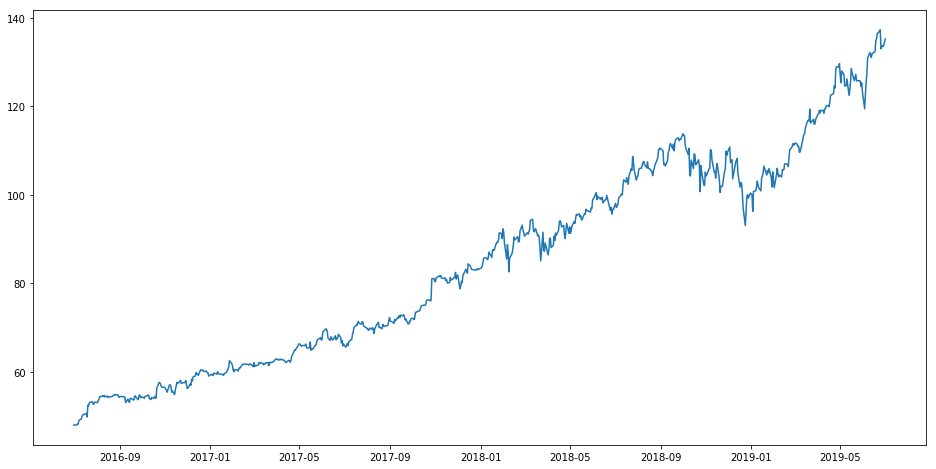

In [39]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df_price['adj_close'], label='Close Price history')

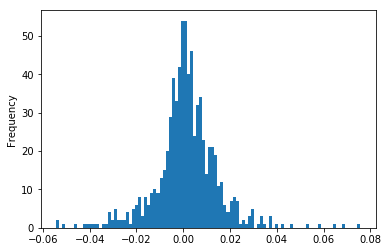

In [40]:
df_price['adj_close'].pct_change().plot.hist(bins=100)

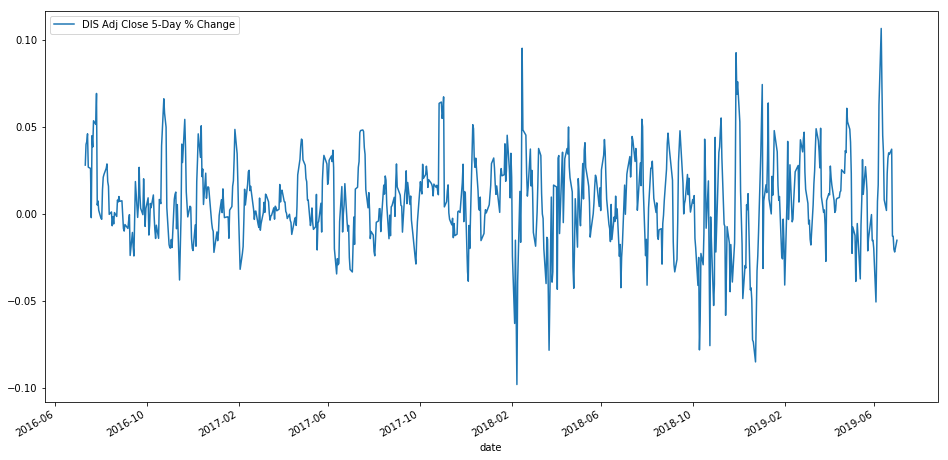

In [41]:
plt.figure(figsize=(16,8))
df_price['adj_close'].pct_change(5).plot(label='DIS Adj Close 5-Day % Change',legend=True)

                     5d_close_pct  5d_close_future_pct
5d_close_pct             1.000000            -0.201898
5d_close_future_pct     -0.201898             1.000000


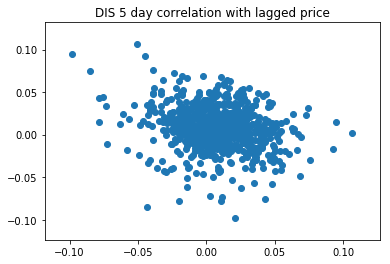

In [42]:
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
df_price['5d_future_close'] = df_price['adj_close'].shift(-5)
df_price['5d_close_future_pct'] = df_price['5d_future_close'].pct_change(5)
df_price['5d_close_pct'] = df_price['adj_close'].pct_change(5)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_price[['5d_close_pct', '5d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('DIS 5 day correlation with lagged price')
plt.scatter(df_price['5d_close_pct'], df_price['5d_close_future_pct'])
plt.show()

                     compound  5d_close_future_pct
compound             1.000000            -0.001928
5d_close_future_pct -0.001928             1.000000


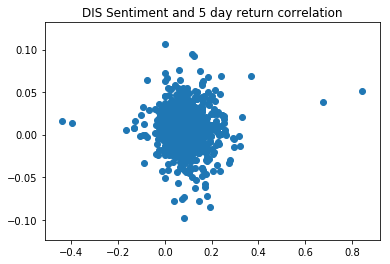

In [43]:
# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_price[['compound', '5d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('DIS Sentiment and 5 day return correlation')
plt.scatter(df_price['compound'], df_price['5d_close_future_pct'])
plt.show()

                     1d_close_pct  1d_close_future_pct
1d_close_pct             1.000000            -0.148377
1d_close_future_pct     -0.148377             1.000000


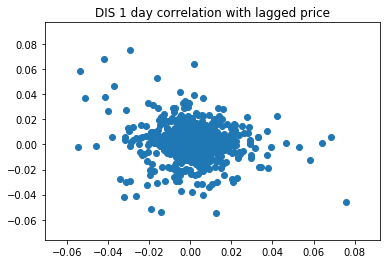

In [44]:
df_1 = df_price
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
df_1['1d_future_close'] = df_1['adj_close'].shift(-1)
df_1['1d_close_future_pct'] = df_1['1d_future_close'].pct_change(1)
df_1['1d_close_pct'] = df_1['adj_close'].pct_change(1)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_1[['1d_close_pct', '1d_close_future_pct']].corr()
print(corr)
# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('DIS 1 day correlation with lagged price')
plt.scatter(df_1['1d_close_pct'], df_1['1d_close_future_pct'])
plt.show()

                     compound  1d_close_future_pct
compound             1.000000             0.019096
1d_close_future_pct  0.019096             1.000000


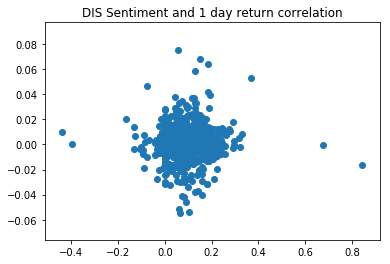

In [45]:
# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_1[['compound', '1d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('DIS Sentiment and 1 day return correlation')
plt.scatter(df_1['compound'], df_1['1d_close_future_pct'])
plt.show()

                      30d_close_pct  30d_close_future_pct
30d_close_pct                1.0000               -0.0485
30d_close_future_pct        -0.0485                1.0000


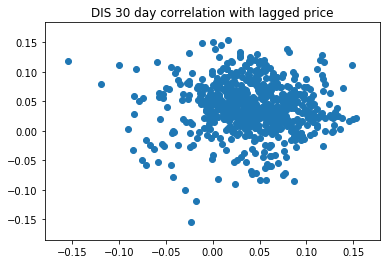

In [46]:
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
df_30 = df_price
df_30['30d_future_close'] = df_price['adj_close'].shift(-30)
df_30['30d_close_future_pct'] = df_price['30d_future_close'].pct_change(30)
df_30['30d_close_pct'] = df_price['adj_close'].pct_change(30)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_30[['30d_close_pct', '30d_close_future_pct']].corr()
print(corr)
# Scatter the current 30-day percent change vs the future 5-day percent change
plt.title('DIS 30 day correlation with lagged price')
plt.scatter(df_30['30d_close_pct'], df_30['30d_close_future_pct'])
plt.show()

                      compound  30d_close_future_pct
compound              1.000000             -0.101841
30d_close_future_pct -0.101841              1.000000


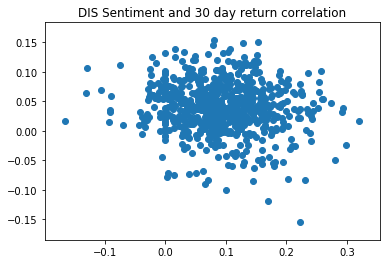

In [47]:
# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_30[['compound', '30d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('DIS Sentiment and 30 day return correlation')
plt.scatter(df_30['compound'], df_30['30d_close_future_pct'])
plt.show()

In [48]:
df_price = df_price.drop(['Unnamed: 0'], axis =1)

In [49]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2016-07-01 to 2019-07-01
Data columns (total 65 columns):
adj_close                         754 non-null float64
adj_high                          754 non-null float64
adj_low                           754 non-null float64
adj_open                          754 non-null float64
adj_volume                        754 non-null float64
close                             754 non-null float64
date                              754 non-null datetime64[ns]
frequency                         754 non-null object
high                              754 non-null float64
intraperiod                       754 non-null bool
low                               754 non-null float64
open                              754 non-null float64
volume                            754 non-null float64
ma14                              754 non-null float64
rsi14                             754 non-null float64
ma30                              754 non-null f

In [50]:
#df_price['MACD'] = pd.Series(talib.MACD(df_price['adj_close'], fastperiod=12, slowperiod=26, signalperiod=9))
#df_price['STOCH'] = pd.Series(talib.STOCH(df_price['adj_high'].values,df_price['adj_low'].values,df_price['adj_close'].values,fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0))

In [51]:
#df_price[:50]

#df_price.drop(['MACD','STOCH'], axis =1)

In [52]:
feature_names = ['5d_close_pct']  # a list of the feature names for later

# Create moving averages and rsi for timeperiods of 14, 30, 50, and 200
for n in [14, 30, 50, 200]:

    
    
    
    # Add rsi and moving average to the feature name list
    feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]

    

        

feature_names = feature_names + ['compound'] + fundamentals
print(feature_names)



['5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200', 'compound', 'marketcap', 'pricetobook', 'pricetoearnings', 'dividendyield', 'earningsyield', 'nopat', 'freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin', 'cashdividendspershare', 'bookvaluepershare', 'capex', 'currentratio', 'debttoequity', 'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth', 'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps', 'operatingrevenue', 'ebitda', 'totalassets', 'totalliabilities', 'debt', 'netincome', 'netcashfromoperatingactivities', 'netcashfrominvestingactivities', 'netcashfromfinancingactivities', 'longterminvestments', 'one_yr_monthly_beta']


In [53]:
# Create 2 new volume features, 1-day % change and 5-day SMA of the % change
new_features = ['Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']
feature_names.extend(new_features)
df_price['Adj_Volume_1d_change'] = df_price['adj_volume'].pct_change()
df_price['Adj_Volume_1d_change_SMA'] = talib.SMA(df_price['Adj_Volume_1d_change'].values,
                                               timeperiod=5)


/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:778: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


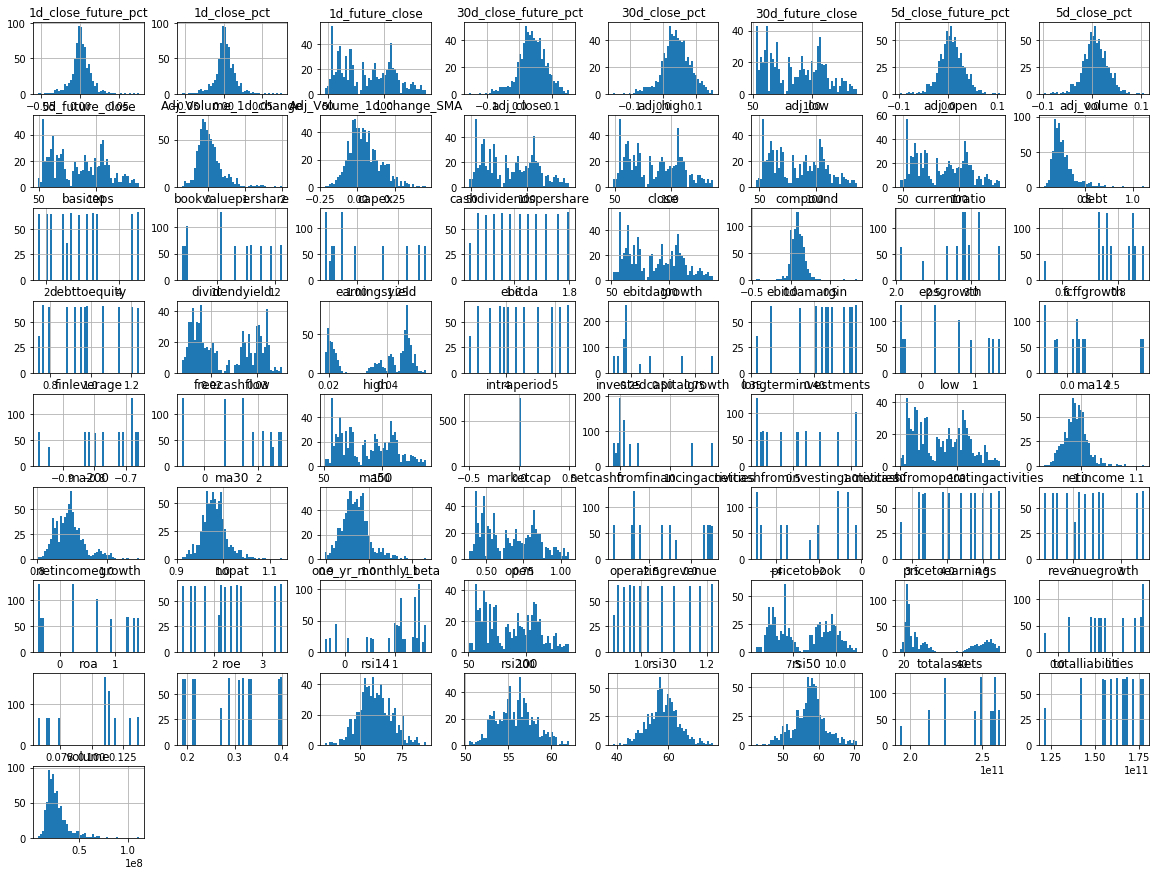

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
df_price.hist(bins=50, figsize=(20,15))
plt.show()

In [55]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2016-07-01 to 2019-07-01
Data columns (total 67 columns):
adj_close                         754 non-null float64
adj_high                          754 non-null float64
adj_low                           754 non-null float64
adj_open                          754 non-null float64
adj_volume                        754 non-null float64
close                             754 non-null float64
date                              754 non-null datetime64[ns]
frequency                         754 non-null object
high                              754 non-null float64
intraperiod                       754 non-null bool
low                               754 non-null float64
open                              754 non-null float64
volume                            754 non-null float64
ma14                              754 non-null float64
rsi14                             754 non-null float64
ma30                              754 non-null f

In [56]:
df_price.columns

Index(['adj_close', 'adj_high', 'adj_low', 'adj_open', 'adj_volume', 'close',
       'date', 'frequency', 'high', 'intraperiod', 'low', 'open', 'volume',
       'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200',
       'compound', 'marketcap', 'pricetobook', 'pricetoearnings',
       'dividendyield', 'earningsyield', 'nopat', 'freecashflow', 'roe',
       'ebitdagrowth', 'ebitdamargin', 'cashdividendspershare',
       'bookvaluepershare', 'capex', 'currentratio', 'debttoequity',
       'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth', 'finleverage',
       'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps',
       'operatingrevenue', 'ebitda', 'totalassets', 'totalliabilities', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments', 'one_yr_monthly_beta', '5d_future_close',
       '5d_close_future_pct', '5d_close_pct', '1d_future_close',
       '1d_clos

In [57]:
# Drop all na values
df_price = df_price.dropna()

# Create features and targets
# use feature_names for features; 5d_close_future_pct for targets
features = df_price[feature_names]
targets = df_price['5d_close_future_pct']

# Create DataFrame from target column and feature columns
feat_targ_df = df_price[['5d_close_future_pct'] + feature_names]

# Calculate correlation matrix
corr = feat_targ_df.corr()
print(corr)

                                5d_close_future_pct  5d_close_pct      ma14  \
5d_close_future_pct                        1.000000     -0.208071  0.276511   
5d_close_pct                              -0.208071      1.000000 -0.830193   
ma14                                       0.276511     -0.830193  1.000000   
rsi14                                     -0.214882      0.631203 -0.809331   
ma30                                       0.287512     -0.639945  0.860610   
rsi30                                     -0.214903      0.487035 -0.664378   
ma50                                       0.237380     -0.532725  0.735585   
rsi50                                     -0.202540      0.403057 -0.563239   
ma200                                      0.212808     -0.328243  0.458225   
rsi200                                    -0.143108      0.245245 -0.345179   
compound                                  -0.032936      0.110899 -0.093903   
marketcap                                 -0.041487 

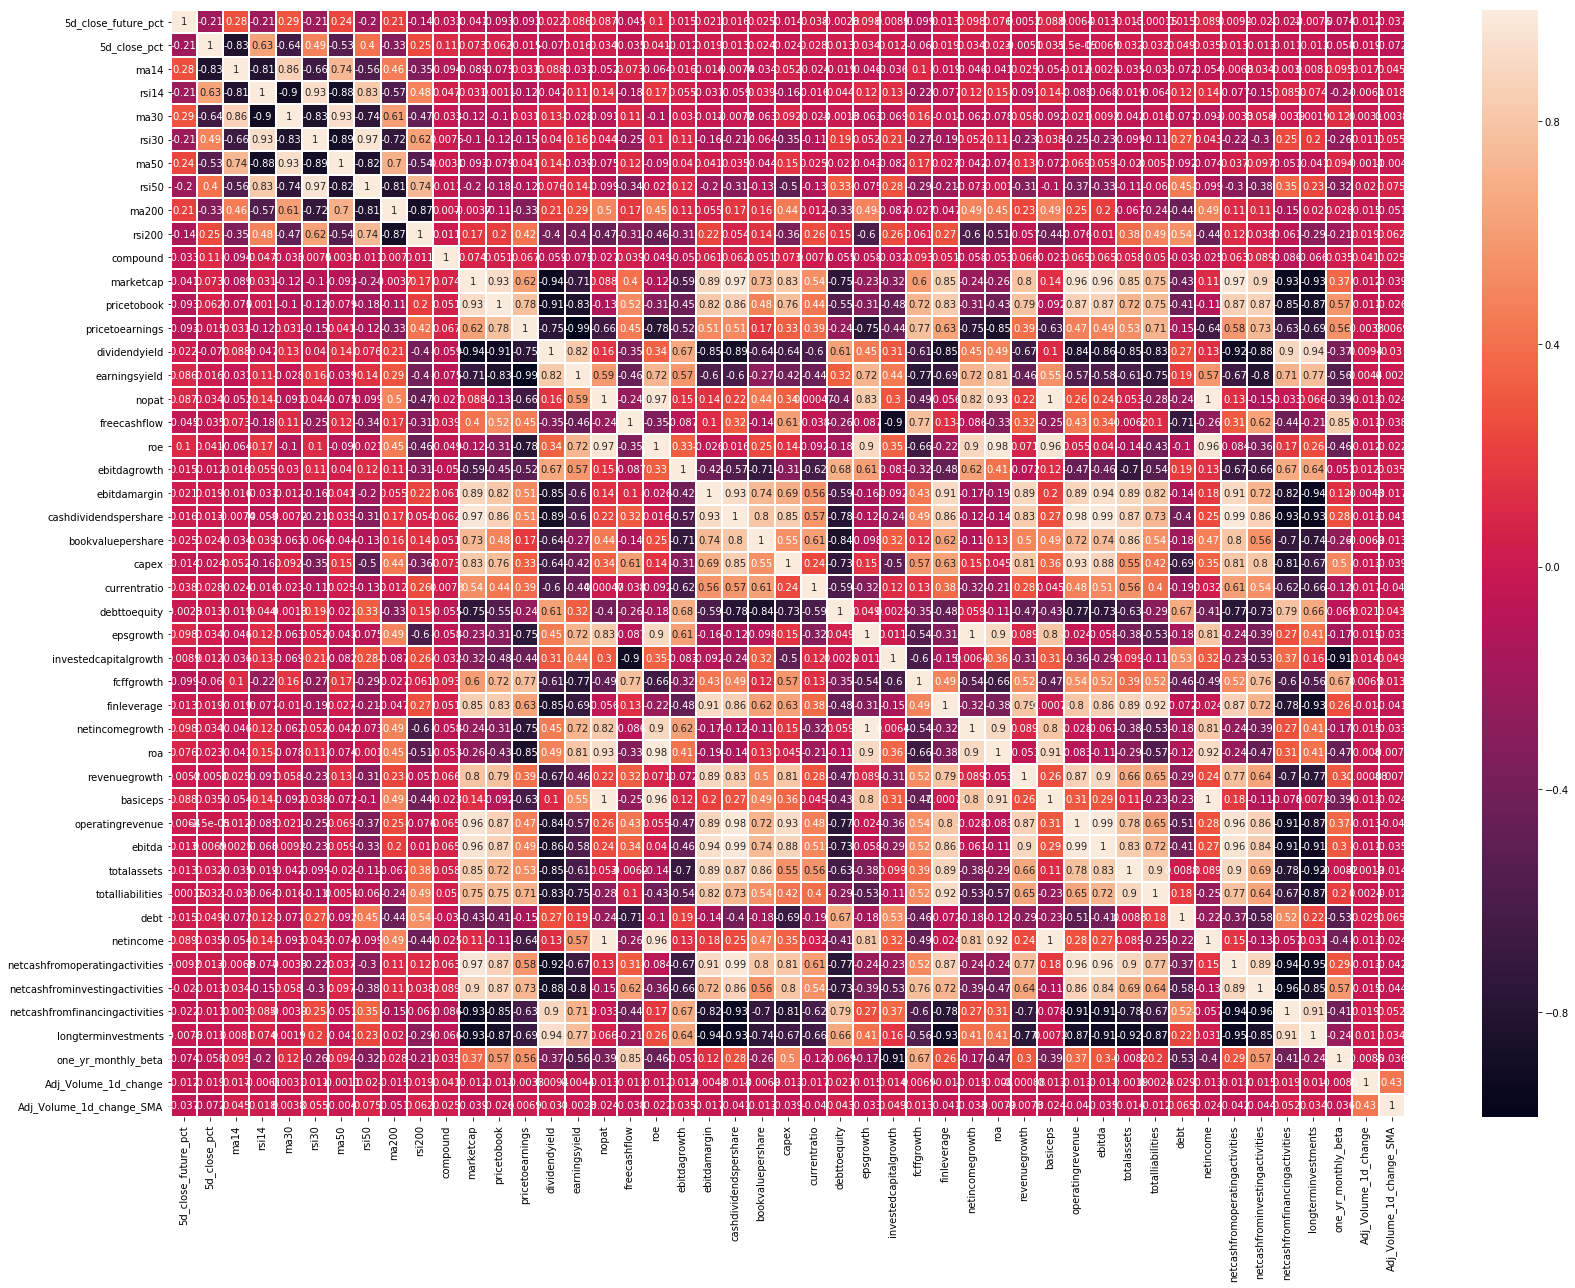

<Figure size 432x288 with 0 Axes>

In [58]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(24, 18))
sns.heatmap(corr, annot=True,linewidths=1)
plt.yticks(rotation=0); plt.xticks(rotation=90)  # fix ticklabel directions
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot
plt.clf()  # clear the plot area

# Create a scatter plot of the most highly correlated variable with the target
#plt.scatter(df_price['ma200'], df_price['5d_close_future_pct'])
#plt.show()

In [59]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = df_price.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.90)]

# Drop the features in the to_drop list
reduced_df = df_price.drop(to_drop, axis=1)

print("The reduced_df dataframe has {} columns".format(reduced_df.shape[1]))

The reduced_df dataframe has 32 columns


In [60]:
reduced_df.columns

Index(['date', 'frequency', 'intraperiod', 'volume', 'ma14', 'ma50', 'rsi50',
       'ma200', 'rsi200', 'compound', 'earningsyield', 'freecashflow',
       'ebitdagrowth', 'bookvaluepershare', 'currentratio', 'debttoequity',
       'fcffgrowth', 'netincomegrowth', 'revenuegrowth', 'totalliabilities',
       'debt', 'netincome', 'one_yr_monthly_beta', '5d_close_future_pct',
       '5d_close_pct', '1d_close_future_pct', '1d_close_pct',
       '30d_future_close', '30d_close_future_pct', '30d_close_pct',
       'Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA'],
      dtype='object')

In [61]:
feature_names=['volume', 'ma14', 'rsi50', 'ma200',
       'rsi200', 'compound',
       'pricetobook', 'dividendyield', 'freecashflow', 'capex',
       'currentratio', 'debttoequity', 'investedcapitalgrowth', 'fcffgrowth',
       'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth',
       'operatingrevenue', 'netincome', 'netcashfromoperatingactivities',
       'netcashfromfinancingactivities', 'longterminvestments',
       'one_yr_monthly_beta',
       '5d_close_pct', 'Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']

In [62]:
feature_names = ['compound',
       'marketcap', 'pricetobook', 'dividendyield', 'earningsyield',
       'ebitdamargin', 'cashdividendspershare', 'bookvaluepershare',
       'currentratio', 'debttoequity', 'fcffgrowth', 'finleverage',
       'revenuegrowth', 'operatingrevenue', 'ebitda', 'totalassets', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments', 'one_yr_monthly_beta', '5d_close_pct', 'ma14', 'ma30', 'ma50', 'rsi50',
       'ma200', 'rsi200', 'Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']

In [63]:
#feature_names = ['5d_close_pct', 'ma14','ma50', 'rsi50', 'ma200', 'rsi200', 'compound', 'pricetobook', 'pricetoearnings', 'dividendyield', 'earningsyield']
#feature_names = ['compound']
features = df_price[feature_names]
targets = reduced_df['5d_close_future_pct']





In [64]:
targets.describe()

count    694.000000
mean       0.006395
std        0.024998
min       -0.098133
25%       -0.007487
50%        0.006639
75%        0.021647
max        0.095110
Name: 5d_close_future_pct, dtype: float64

In [65]:
# Import the statsmodels library with the alias sm
import statsmodels.api as sm

# Add a constant to the features
linear_features = sm.add_constant(features)

# Create a size for the training set that is 85% of the total number of samples
train_size = int(0.80 * features.shape[0])
train_features = linear_features[:train_size]
train_targets = targets[:train_size]
test_features = linear_features[train_size:len(targets)]
test_targets = targets[train_size:len(targets)]
print(linear_features.shape, train_features.shape, test_features.shape)
print(linear_features.shape, train_features.shape, test_features.shape)

(694, 33) (555, 33) (139, 33)
(694, 33) (555, 33) (139, 33)


In [66]:
train_size

555

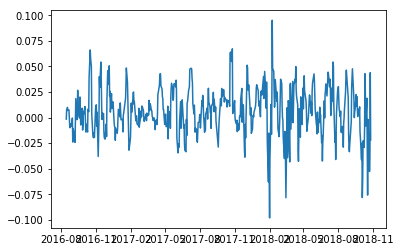

In [67]:
plt.plot(train_targets)

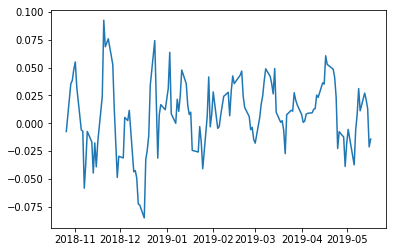

In [68]:
plt.plot(test_targets)

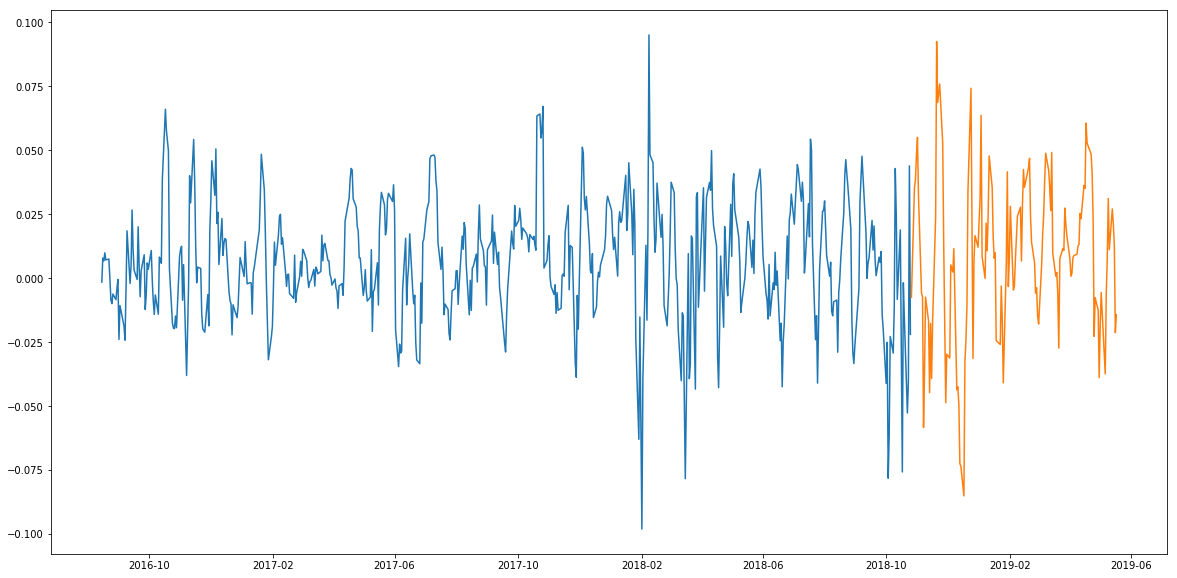

In [69]:
plt.figure(figsize=(20,10))
plt.plot(train_targets)
plt.plot(test_targets)
plt.show()

In [70]:
# Create the linear model and complete the least squares fit
model = sm.OLS(train_targets, train_features)
results = model.fit()  # fit the model
print(results.summary())

# examine pvalues
# Features with p <= 0.05 are typically considered significantly different from 0
print(results.pvalues)

# Make predictions from our model for train and test sets
train_predictions = results.predict(train_features)
test_predictions = results.predict(test_features)

                             OLS Regression Results                            
Dep. Variable:     5d_close_future_pct   R-squared:                       0.313
Model:                             OLS   Adj. R-squared:                  0.287
Method:                  Least Squares   F-statistic:                     12.17
Date:                 Thu, 05 Sep 2019   Prob (F-statistic):           1.96e-32
Time:                         23:50:07   Log-Likelihood:                 1406.6
No. Observations:                  555   AIC:                            -2771.
Df Residuals:                      534   BIC:                            -2681.
Df Model:                           20                                         
Covariance Type:             nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
co

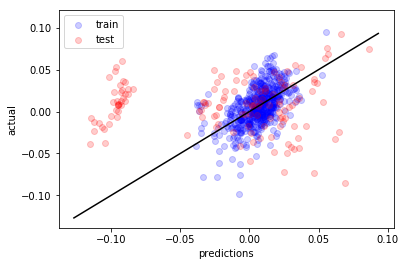

In [71]:
# Scatter the predictions vs the targets with 80% transparency
plt.scatter(train_predictions, train_targets, alpha=0.2, color='b', label='train')
plt.scatter(test_predictions, test_targets, alpha= 0.2, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

# Set the axis labels and show the plot
plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()  # show the legend
plt.show()

In [72]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
# scikit-learn:
lr = LinearRegression()
lr.fit(train_features, train_targets)

# Make predictions with our model
train_predictions = lr.predict(train_features)
test_predictions = lr.predict(test_features)

# Create a scatter plot with train and test actual vs predictions
#plt.scatter(train_targets, train_predictions, label='train')
#plt.scatter(test_targets, test_predictions, label='test')
#plt.legend()
#plt.show()

In [73]:
# Look at the R^2 scores on train and test
print(lr.score(train_features, train_targets))
print(lr.score(test_features, test_targets))

0.31619101596998067
-1.863877534421314


In [74]:
print(mean_squared_error(train_targets, train_predictions))
print(mean_squared_error(test_targets, test_predictions))


0.0003665632141472006
0.0027879757863110573


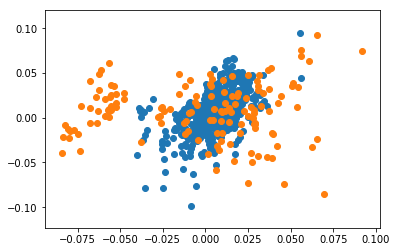

In [75]:
# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.show()

In [76]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [77]:
scaler = StandardScaler()


scaled_train_features = scaler.fit_transform(train_features)
scaled_test_features = scaler.fit_transform(test_features)

print(linear_features.shape, scaled_train_features.shape, scaled_test_features.shape)
print(linear_features.shape, scaled_train_features.shape, scaled_test_features.shape)

(694, 33) (555, 33) (139, 33)
(694, 33) (555, 33) (139, 33)


In [78]:
# scikit-learn:
lr = LinearRegression()
lr.fit(scaled_train_features, train_targets)

# Make predictions with our model
train_predictions = lr.predict(scaled_train_features)
test_predictions = lr.predict(scaled_test_features)

# Create a scatter plot with train and test actual vs predictions
#plt.scatter(train_targets, train_predictions, label='train')
#plt.scatter(test_targets, test_predictions, label='test')
#plt.legend()
#plt.show()b

In [79]:
# Look at the R^2 scores on train and test
print(lr.score(scaled_train_features, train_targets))
print(lr.score(scaled_test_features, test_targets))

0.2906724743649278
-9.633692859647756


In [80]:
print(mean_squared_error(train_targets, train_predictions))
print(mean_squared_error(test_targets, test_predictions))
rsme_train = np.sqrt(mean_squared_error(train_targets, train_predictions))
rsme_test = np.sqrt(mean_squared_error(test_targets, test_predictions))
print('Train Root mean squared error: ' + str(rsme_train))
print('Test Root mean squared error: ' + str(rsme_test))

0.0003802427048376689
0.010351866605831386
Train Root mean squared error: 0.01949981294365843
Test Root mean squared error: 0.10174412320046493


In [81]:
column =['Prediction']
test= pd.DataFrame(test_predictions,columns=column,index=test_targets.index)
test

,Prediction
date,
2018-10-26,0.084915
2018-10-29,0.094546
2018-10-30,0.090673
2018-10-31,0.079636
2018-11-01,0.084931
2018-11-02,0.083350
2018-11-05,0.079118
2018-11-06,0.077833
2018-11-07,0.072867


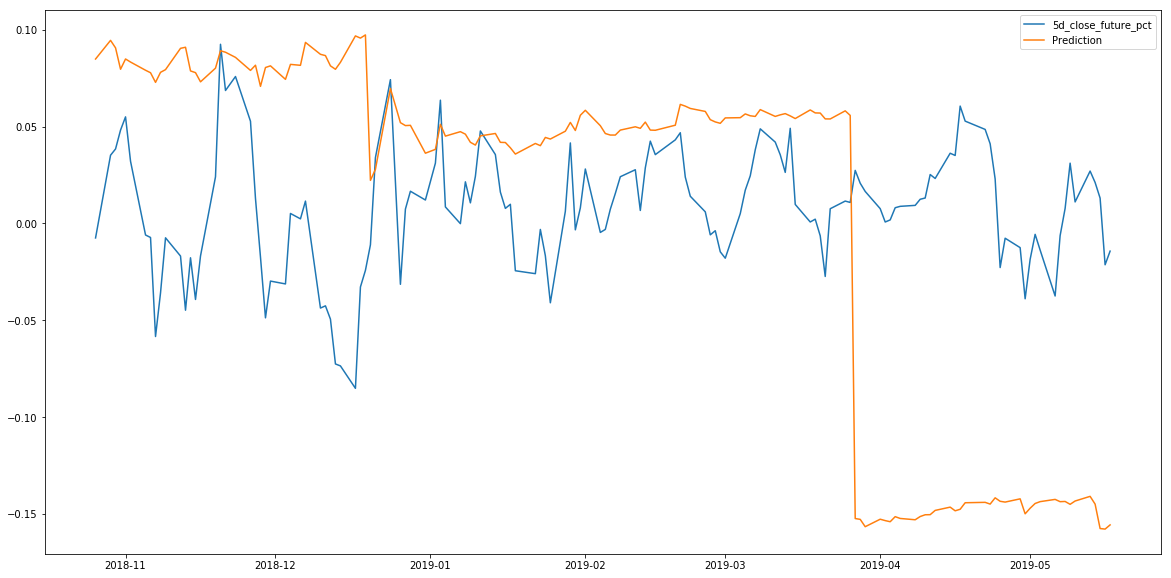

In [82]:
plt.figure(figsize=(20,10))
plt.plot(test_targets)
plt.plot(test)
plt.legend(['5d_close_future_pct','Prediction'])
plt.show()

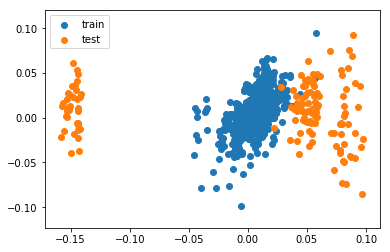

In [83]:
# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.legend()
plt.show()

### Lasso And Ridge - https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
scaler = StandardScaler()
# Fit the scaler on the training features and transform these in one go
scaled_train_features = scaler.fit_transform(train_features)

# Create the Lasso model 
la = Lasso()

# Fit it to the standardized training data
la.fit(scaled_train_features, train_targets)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [85]:
# Transform the test set with the pre-fitted scaler
scaled_test_features = scaler.transform(test_features)

# Calculate the coefficient of determination (R squared) on X_test_std
r_squared = la.score(scaled_test_features, test_targets)
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))

# Create a list that has True values when coefficients equal 0
zero_coef = la.coef_ == 0

# Calculate how many features have a zero coefficient
n_ignored = sum(zero_coef)
print("The model has ignored {} out of {} features.".format(n_ignored, len(la.coef_)))

The model can predict -0.2% of the variance in the test set.
The model has ignored 33 out of 33 features.


In [86]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.1,normalize=True)

lassoReg.fit(train_features, train_targets)

pred = lassoReg.predict(test_features)
train_pred= lassoReg.predict(train_features)

train_score = r2_score(train_targets, train_pred)
score = r2_score(test_targets, pred)
mse = mean_squared_error(test_targets, pred)

print(train_score)
print(score)
print(mse)
print(np.sqrt(mse))

0.0
-0.002108307717910707
0.0009755492906379537
0.03123378444309869


In [87]:
from sklearn.linear_model import Ridge

alphas = np.array([20,10,5,4,3,2,1.5,1,0.5,0.1,0.01,0.001,0.0001,0])
test_scores=[]
train_scores=[]

for n in alphas:
    ridgeReg = Ridge(alpha=n, normalize=True)
    ridgeReg.fit(train_features, train_targets)
    pred = ridgeReg.predict(test_features)
    train_pred= ridgeReg.predict(train_features)
    train_score = r2_score(train_targets, train_pred)
    train_scores.append(train_score)
    score = r2_score(test_targets, pred)
    test_scores.append(score)


ridge=pd.DataFrame(data=test_scores, index=alphas)

ridge

,0
20.0000,2.676486e-02
10.0000,3.903658e-02
5.0000,4.464296e-02
4.0000,4.352050e-02
3.0000,3.934099e-02
2.0000,2.761099e-02
1.5000,1.469651e-02
1.0000,-1.095619e-02
0.5000,-8.043870e-02
0.1000,-4.444980e-01


In [206]:
ridgeReg = Ridge(alpha=5, normalize=True)

ridgeReg.fit(train_features, train_targets)

pred = ridgeReg.predict(test_features)
train_pred= ridgeReg.predict(train_features)

train_score = r2_score(train_targets, train_pred)
score = r2_score(test_targets, pred)
mse = mean_squared_error(test_targets, test_predictions)

print('Train r2: ' + str(train_score))
print('Test r2: ' + str(score))
#print(mse)
#print(np.sqrt(mse))

Train r2: 0.08512348607660758
Test r2: 0.0446429590848203


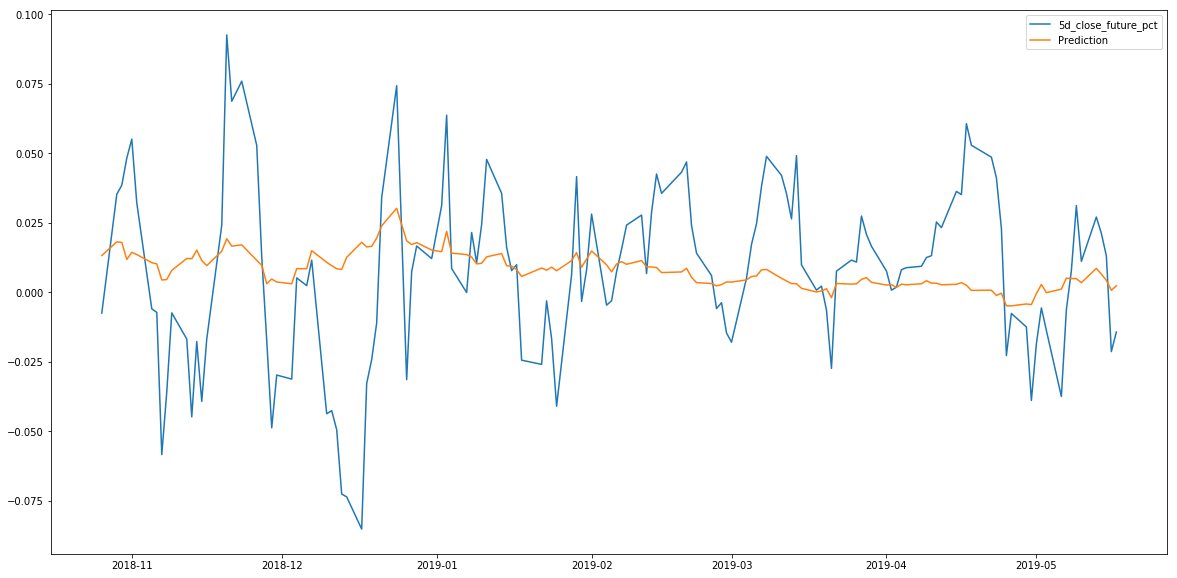

In [207]:
column =['Prediction']
ridge_pred= pd.DataFrame(pred,columns=column,index=test_targets.index)


plt.figure(figsize=(20,10))
plt.plot(test_targets)
plt.plot(ridge_pred)
plt.legend(['5d_close_future_pct','Prediction'])
plt.show()

In [90]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=0.5, l1_ratio=1, normalize=False)

ENreg.fit(train_features,train_targets)

pred_cv = ENreg.predict(test_features)
train_pred= ENreg.predict(train_features)

train_score = r2_score(train_targets, train_pred)
score = r2_score(test_targets, pred_cv)
mse = mean_squared_error(test_targets, pred_cv)

print('Train r2: ' + str(train_score))
print('Test r2: ' + str(score))
#print(mse)
#print(np.sqrt(mse))

Train r2: 0.10121289580456039
Test r2: -0.7995617713564394


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### PLS - https://www.idtools.com.au/partial-least-squares-regression-python/

In [91]:
#S basic codePython
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define PLS object
pls = PLSRegression(n_components=1)

# Fit
pls.fit(scaled_train_features, train_targets)

# Prediction
train_predicitions = pls.predict(scaled_train_features)
test_predicitions = pls.predict(scaled_test_features)

# Calculate scores
train_score = r2_score(train_targets,train_predictions)
score = r2_score(test_targets, test_predictions)
mse = mean_squared_error(test_targets, test_predictions)

print('Train r2: ' + str(train_score))
print('Test r2: ' + str(score))
print(mse)
print(np.sqrt(mse))


Train r2: 0.2906724743649278
Test r2: -9.633692859647756
0.010351866605831386
0.10174412320046493


In [92]:
from sys import stdout
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
from scipy.signal import savgol_filter
 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score

In [93]:
X_calib = scaled_train_features
Y_calib = train_targets
X_valid = scaled_test_features
Y_valid = test_targets

def prediction(X_calib, Y_calib, X_valid, Y_valid, plot_components=False):
 
    #Run PLS including a variable number of components, up to 40,  and calculate MSE
    mse = []
    component = np.arange(1, 29)
    for i in component:
        pls = PLSRegression(n_components=i)
        # Fit
        pls.fit(train_features, Y_calib)
        # Prediction
        Y_pred = pls.predict(X_valid)
 
        mse_p = mean_squared_error(Y_valid, Y_pred)
        mse.append(mse_p)
 
        comp = 100*(i+1)/40
        # Trick to update status on the same line
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")
 
    # Calculate and print the position of minimum in MSE
    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
    stdout.write("\n")
 
    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE')
            plt.title('PLS')
            plt.xlim(xmin=-1)
 
        plt.show()
    # Run PLS with suggested number of components
    pls = PLSRegression(n_components=msemin+1)
    pls.fit(train_features, Y_calib)
    Y_pred = pls.predict(X_valid) 
    
    # Calculate and print scores
    score_p = r2_score(Y_valid, Y_pred)
    mse_p = mean_squared_error(Y_valid, Y_pred)
    sep = np.std(Y_pred[:,0]-Y_valid)
    rpd = np.std(Y_valid)/sep
    bias = np.mean(Y_pred[:,0]-Y_valid)
    
    print('R2: %5.3f'  % score_p)
    print('MSE: %5.3f' % mse_p)
    print('SEP: %5.3f' % sep)
    print('RPD: %5.3f' % rpd)
    print('Bias: %5.3f' %  bias)
 
    # Plot regression and figures of merit
    rangey = max(Y_valid) - min(Y_valid)
    rangex = max(Y_pred) - min(Y_pred)
 
    z = np.polyfit(Y_valid, Y_pred, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(Y_pred, Y_valid, c='red', edgecolors='k')
        ax.plot(z[1]+z[0]*Y_valid, Y_valid, c='blue', linewidth=1)
        ax.plot(Y_valid, Y_valid, color='green', linewidth=1)
        plt.xlabel('Predicted')
        plt.ylabel('Measured')
        plt.title('Prediction')
 
        # Print the scores on the plot
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.1*rangey, 'R$^{2}=$ %5.3f'  % score_p)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.15*rangey, 'MSE: %5.3f' % mse_p)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.2*rangey, 'SEP: %5.3f' % sep)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.25*rangey, 'RPD: %5.3f' % rpd)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.3*rangey, 'Bias: %5.3f' %  bias)
        plt.show()

72% completed
Suggested number of components:  1

R2: -164.500
MSE: 0.161
SEP: 0.390
RPD: 0.080
Bias: -0.094


/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 24
  warnings.warn('X scores are null at iteration %s' % k)
/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 24
  warnings.warn('X scores are null at iteration %s' % k)
/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 24
  warnings.warn('X scores are null at iteration %s' % k)
/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 24
  warnings.warn('X scores are null at iteration %s' % k)


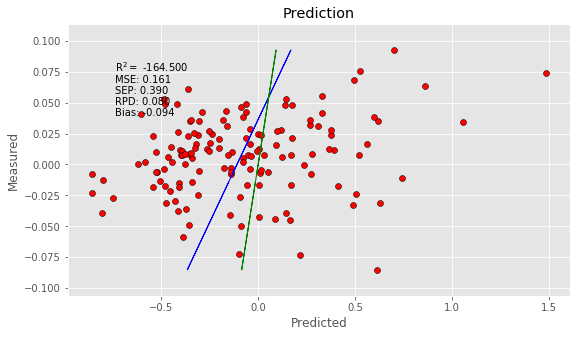

In [94]:
prediction(X_calib, Y_calib, X_valid, Y_valid, plot_components=False)

### PCA

[ 49.13  65.14  74.9   81.08  85.55  88.85  91.84  94.11  95.85  97.39
  98.15  98.6   98.91  99.19  99.41  99.61  99.72  99.82  99.89  99.94
  99.97 100.   100.01 100.02 100.02 100.02 100.02 100.02 100.02 100.02
 100.02 100.02 100.02]
0.12658939754386622
0.01624226954529162
0.0009576850612986303
0.03094648705909332


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


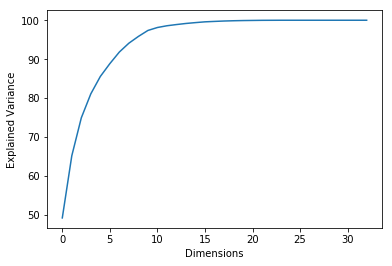

In [100]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

#convert it to numpy arrays
X=train_features
X_test=test_features

#Scaling the values
X = scale(X)
X_test=scale(X_test)

pca = PCA(n_components=33)

pca.fit(X)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_



#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print(var1)

plt.plot(var1)
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')

#Looking at above plot I'm taking 30 variables
pca = PCA(n_components=8)
pca.fit(X)
X1=pca.fit_transform(X)
X1_test=pca.fit_transform(X_test)

from sklearn import linear_model
regr = linear_model.LinearRegression() 

y = train_targets
regr.fit(X1,y)
pred=regr.predict(X1)
y_pred=regr.predict(X1_test)


train_score = r2_score(train_targets, pred)
score = r2_score(test_targets, y_pred)
mse = mean_squared_error(test_targets, y_pred)

print(train_score)
print(score)
print(mse)
print(np.sqrt(mse))

### Decision Tree

In [101]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor()

# Fit the model to the training features and targets
decision_tree.fit(train_features, train_targets)

# Check the score on train and test
print(decision_tree.score(train_features, train_targets))
print(decision_tree.score(test_features, test_targets))

0.999987137604837
-0.8856875332923586


In [102]:
#Scaled Data
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor()

# Fit the model to the training features and targets
decision_tree.fit(scaled_train_features, train_targets)

# Check the score on train and test
print(decision_tree.score(scaled_train_features, train_targets))
print(decision_tree.score(scaled_test_features, test_targets))

0.999987137604837
-1.7565989243515117


In [103]:
for d in [3,5,10]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d,random_state=42)
    decision_tree.fit(train_features,train_targets)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree.score(train_features, train_targets))
    print(decision_tree.score(test_features, test_targets), '\n')

max_depth= 3
0.27530835083261307
-0.10934528651513808 

max_depth= 5
0.4078468793695953
-0.728588282311398 

max_depth= 10
0.853463494870647
-1.972678015886809 



In [104]:
#Scaled Data
for d in [3,5,10]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d,random_state=42)
    decision_tree.fit(train_features,train_targets)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree.score(scaled_train_features, train_targets))
    print(decision_tree.score(scaled_test_features, test_targets), '\n')

max_depth= 3
-1.2063150473067683
-1.228121320481613 

max_depth= 5
-0.8949359035475675
-1.6272680096819174 

max_depth= 10
-0.9917346934765545
-1.6027777311348812 



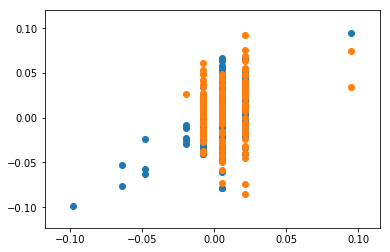

In [105]:
# Use the best max_depth of 3 from last exercise to fit a decision tree
decision_tree = DecisionTreeRegressor(max_depth=3)
decision_tree.fit(train_features, train_targets)

# Predict values for train and test
train_predictions = decision_tree.predict(train_features)
test_predictions = decision_tree.predict(test_features)

# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.show()

### Random Forest

In [106]:
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

0.9298256596396384
-0.4503833738706191


Usually, we can use sklearn's GridSearchCV() method to search hyperparameters, but with a financial time series, we don't want to do cross-validation due to data mixing. We want to fit our models on the oldest data and evaluate on the newest data. So we'll use sklearn's ParameterGrid to create combinations of hyperparameters to search.

In [107]:
from sklearn.model_selection import ParameterGrid

# Create a dictionary of hyperparameters to search
grid = {'n_estimators':[200], 'max_depth': [3], 'max_features': [4,28], 'random_state': [42]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(train_features, train_targets)
    test_scores.append(rfr.score(test_features, test_targets))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

-0.1428900838109899 {'random_state': 42, 'n_estimators': 200, 'max_features': 4, 'max_depth': 3}


In [108]:
rfr = RandomForestRegressor(n_estimators=200,max_features=4,max_depth=3,random_state=42)
rfr.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

0.3113978289692577
-0.1428900838109899


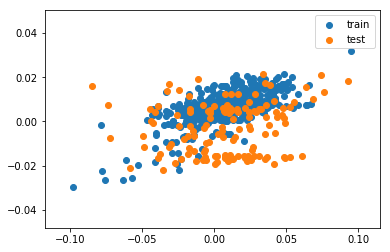

In [204]:
# Use the best hyperparameters from before to fit a random forest model
rfr = RandomForestRegressor(n_estimators=200, max_depth=3, max_features=4, random_state=42)
rfr.fit(train_features, train_targets)

# Make predictions with our model
train_predictions = rfr.predict(train_features)
test_predictions = rfr.predict(test_features)

# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_targets, train_predictions, label='train')
plt.scatter(test_targets, test_predictions, label='test')
plt.legend()
plt.show()

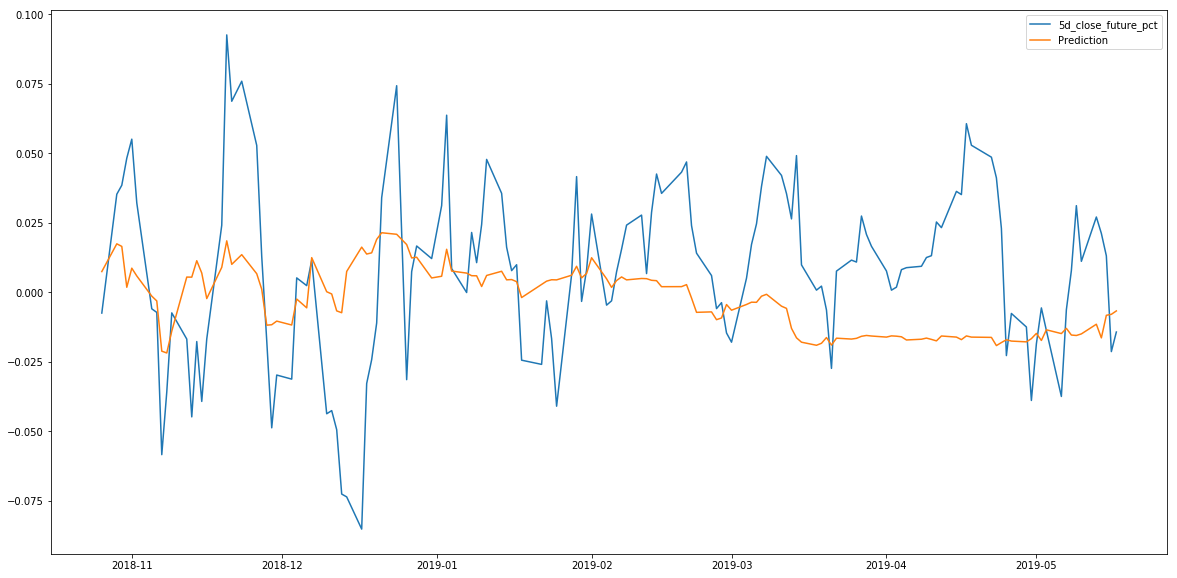

In [205]:
column =['Prediction']
rfr_pred= pd.DataFrame(test_predictions,columns=column,index=test_targets.index)


plt.figure(figsize=(20,10))
plt.plot(test_targets)
plt.plot(rfr_pred)
plt.legend(['5d_close_future_pct','Prediction'])
plt.show()

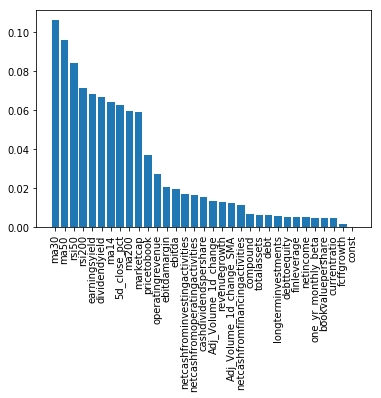

In [110]:
# Get feature importances from our random forest model
importances = rfr.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))
#x = range(features.shape)
# Create tick labels 
#labels = np.array(feature_names)[sorted_index]
labels = [linear_features.columns[i] for i in sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical

plt.xticks(rotation=90)
plt.show()

In [202]:
from sklearn.ensemble import GradientBoostingRegressor

# Create GB model -- hyperparameters have already been searched for you
gbr = GradientBoostingRegressor(max_features=3,
                                learning_rate=0.01,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=42)
gbr.fit(train_features,train_targets)
train_predictions = gbr.predict(train_features)
test_predictions = gbr.predict(test_features)

print(gbr.score(train_features, train_targets))
print(gbr.score(test_features,test_targets))

0.4035308361021983
-0.17422255466119152


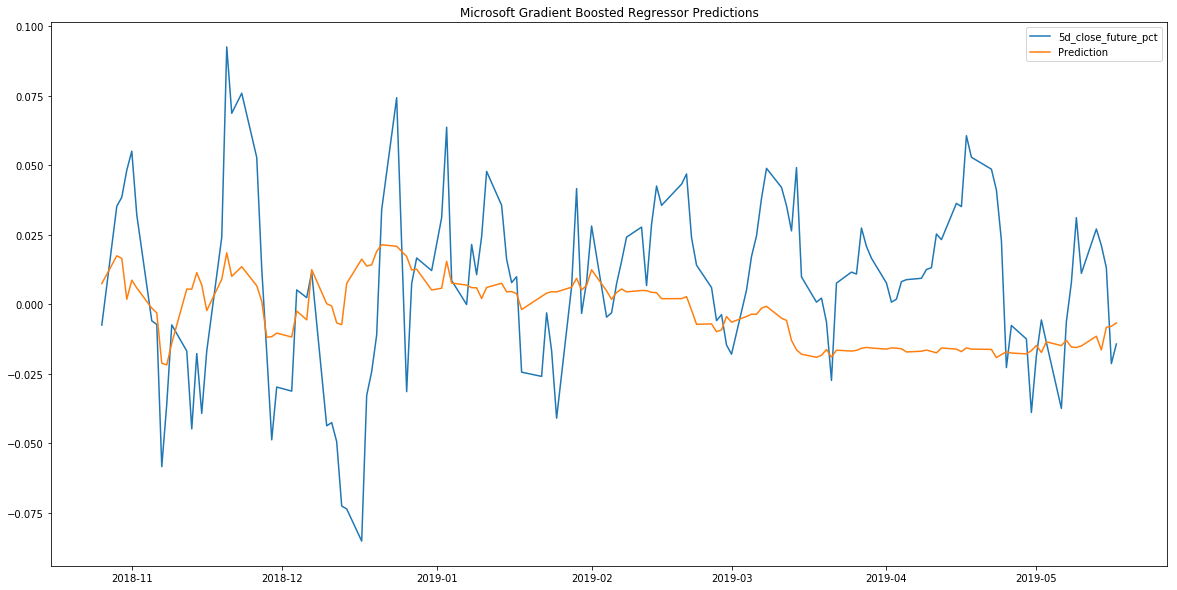

In [208]:
column =['Prediction']
gbr_pred= pd.DataFrame(test_predictions,columns=column,index=test_targets.index)


plt.figure(figsize=(20,10))
plt.plot(test_targets)
plt.plot(gbr_pred)
plt.legend(['5d_close_future_pct','Prediction'])
plt.title('Microsoft Gradient Boosted Regressor Predictions')
plt.show()

In [112]:
# Sort feature importances in descending order
#indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
#names = [iris.feature_names[i] for i in indices]

# Create plot
#plt.figure()

# Create plot title
#plt.title("Feature Importance")

# Add bars
#plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
#plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
#plt.show()

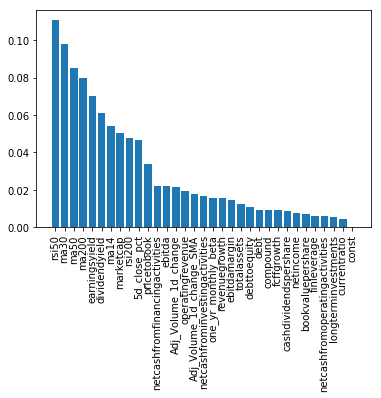

In [113]:
# Extract feature importances from the fitted gradient boosting model
feature_importances = gbr.feature_importances_

# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[::-1]
x = range(len(feature_importances))

# Create tick labels 
#labels = np.array(feature_names)[sorted_index]
labels = [linear_features.columns[i] for i in sorted_index]
plt.bar(x, feature_importances[sorted_index], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plt.xticks(rotation=90)
plt.show()

### K Nearest Neighbour

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


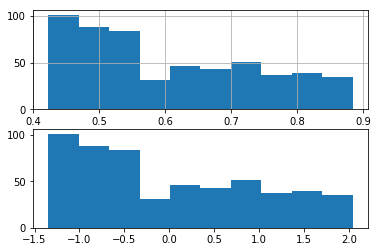

In [114]:


# Standardize the train and test features
scaled_train_features = scale(train_features)
scaled_test_features = scale(test_features)

# Plot histograms of the 14-day SMA RSI before and after scaling
f, ax = plt.subplots(nrows=2, ncols=1)
train_features.iloc[:, 2].hist(ax=ax[0])
ax[1].hist(scaled_train_features[:, 2])
plt.show()

In [115]:
from sklearn.neighbors import KNeighborsRegressor

for n in range(2, 20):
    # Create and fit the KNN model
    knn = KNeighborsRegressor(n_neighbors=n)
    
    # Fit the model to the training data
    knn.fit(scaled_train_features, train_targets)
    
    # Print number of neighbors and the score to find the best value of n
    print("n_neighbors =", n)
    print('train, test scores')
    print(knn.score(scaled_train_features, train_targets))
    print(knn.score(scaled_test_features, test_targets))
    print()  # prints a blank line

n_neighbors = 2
train, test scores
0.7710234031761095
-0.028985011579090614

n_neighbors = 3
train, test scores
0.6553988103716055
0.03478705673600391

n_neighbors = 4
train, test scores
0.5966063697084377
0.03853303941293096

n_neighbors = 5
train, test scores
0.5241613053615171
0.0788803585842649

n_neighbors = 6
train, test scores
0.48295869347094106
0.09452153496560656

n_neighbors = 7
train, test scores
0.4608248763511573
0.11788898852235263

n_neighbors = 8
train, test scores
0.4134445400536303
0.10295426395909746

n_neighbors = 9
train, test scores
0.3829143076559174
0.11120796785052045

n_neighbors = 10
train, test scores
0.3543528420690547
0.11927384474806779

n_neighbors = 11
train, test scores
0.3355891866598253
0.11958716118682002

n_neighbors = 12
train, test scores
0.31534480011730937
0.12808682597054577

n_neighbors = 13
train, test scores
0.3037466052046345
0.12365151383562578

n_neighbors = 14
train, test scores
0.2938332520100565
0.11532408825218343

n_neighbors = 15


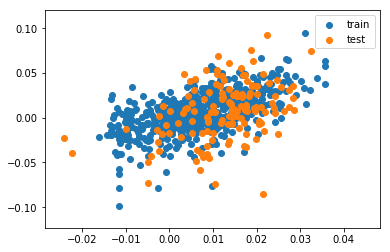

In [117]:
# Create the model with the best-performing n_neighbors of 5
knn = KNeighborsRegressor(n_neighbors=11)

# Fit the model
knn.fit(scaled_train_features, train_targets)

# Get predictions for train and test sets
train_predictions = knn.predict(scaled_train_features)
test_predictions = knn.predict(scaled_test_features)

# Plot the actual vs predicted values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.legend()
plt.show()

### Neural Network 

In [118]:
from keras.models import Sequential
from keras.layers import Dense

# Create the model
model_1 = Sequential()
model_1.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(1, activation='linear'))

# Fit the model
model_1.compile(optimizer='adam', loss='mse')
history = model_1.fit(scaled_train_features, train_targets, epochs=25)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/25
555/555 [==============================] - 0s 272us/step - loss: 0.3360
Epoch 2/25
555/555 [==============================] - 0s 21us/step - loss: 0.0375
Epoch 3/25
555/555 [==============================] - 0s 20us/step - loss: 0.0136
Epoch 4/25
555/555 [==============================] - 0s 21us/step - loss: 0.0082
Epoch 5/25
555/555 [==============================] - 0s 23us/step - loss: 0.0066
Epoch 6/25
555/555 [==============================] - 0s 30us/step - loss: 0.0051
Epoch 7/25
555/555 [==============================] - 0s 28us/step - loss: 0.0043
Epoch 8/25
555/555 [==============================] - 0s 25us/step - loss: 0.0036
Epoch 9/25
555/555 [==============================] - 0s 21us/step - loss: 0.0032
Epoch 10/25
555/555 [==============================] - 0s 24us/step - loss: 0.0029
Epoch 11/25
555/555 [==============================] - 0s 27us/step - loss: 0.0025
Epoch 12/25
555/555 [==============================] - 0s 24us/step - loss: 0.0022
Epoch 13/25


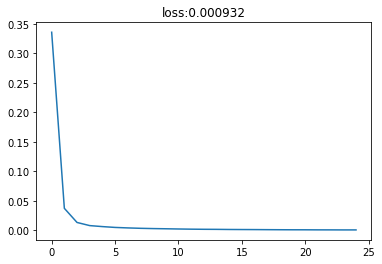

In [119]:
# Plot the losses from the fit
plt.plot(history.history['loss'])

# Use the last loss as the title
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

-0.6191638920498048
-16.76465609796333


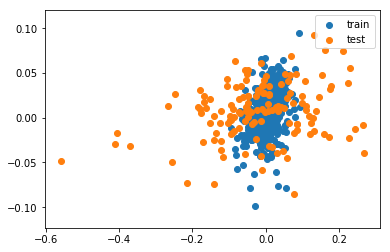

In [120]:
from sklearn.metrics import r2_score

# Calculate R^2 score
train_preds = model_1.predict(scaled_train_features)
test_preds = model_1.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Plot predictions vs actual
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds,test_targets, label='test')
plt.legend()
plt.show()

In [121]:
import keras.losses
import tensorflow as tf

# Create loss function
def sign_penalty(y_true, y_pred):
    penalty = 100.
    loss = tf.where(tf.less(y_true * y_pred, 0), \
                     penalty * tf.square(y_true - y_pred), \
                     tf.square(y_true - y_pred))

    return tf.reduce_mean(loss, axis=-1)

keras.losses.sign_penalty = sign_penalty  # enable use of loss with keras
print(keras.losses.sign_penalty)

<function sign_penalty at 0x1c4364ed08>


Epoch 1/25
555/555 [==============================] - 0s 316us/step - loss: 5.3471
Epoch 2/25
555/555 [==============================] - 0s 23us/step - loss: 1.2658
Epoch 3/25
555/555 [==============================] - 0s 21us/step - loss: 0.5260
Epoch 4/25
555/555 [==============================] - 0s 23us/step - loss: 0.2975
Epoch 5/25
555/555 [==============================] - 0s 22us/step - loss: 0.1963
Epoch 6/25
555/555 [==============================] - 0s 34us/step - loss: 0.1423
Epoch 7/25
555/555 [==============================] - 0s 29us/step - loss: 0.1218
Epoch 8/25
555/555 [==============================] - 0s 25us/step - loss: 0.0874
Epoch 9/25
555/555 [==============================] - 0s 21us/step - loss: 0.0748
Epoch 10/25
555/555 [==============================] - 0s 30us/step - loss: 0.0675
Epoch 11/25
555/555 [==============================] - 0s 27us/step - loss: 0.0614
Epoch 12/25
555/555 [==============================] - 0s 24us/step - loss: 0.0552
Epoch 13/25


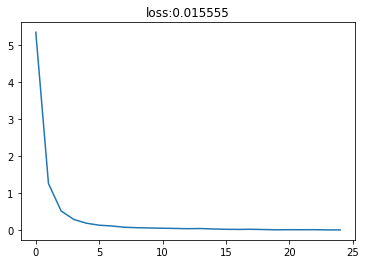

In [122]:
# Create the model
model_2 = Sequential()
model_2.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_2.add(Dense(20, activation='relu'))
model_2.add(Dense(1, activation='linear'))

# Fit the model with our custom 'sign_penalty' loss function
model_2.compile(optimizer='adam', loss=sign_penalty)
history = model_2.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

-6.371550435861548
-52.152285332334856


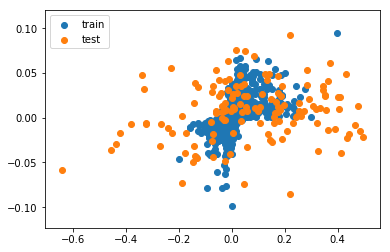

In [123]:
# Evaluate R^2 scores
train_preds = model_2.predict(scaled_train_features)
test_preds = model_2.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label= 'test')  # plot test set
plt.legend(); plt.show()

Epoch 1/25
555/555 [==============================] - 0s 385us/step - loss: 0.0705
Epoch 2/25
555/555 [==============================] - 0s 24us/step - loss: 0.0395
Epoch 3/25
555/555 [==============================] - 0s 27us/step - loss: 0.0265
Epoch 4/25
555/555 [==============================] - 0s 27us/step - loss: 0.0187
Epoch 5/25
555/555 [==============================] - 0s 25us/step - loss: 0.0160
Epoch 6/25
555/555 [==============================] - 0s 35us/step - loss: 0.0121
Epoch 7/25
555/555 [==============================] - 0s 29us/step - loss: 0.0107
Epoch 8/25
555/555 [==============================] - 0s 28us/step - loss: 0.0093
Epoch 9/25
555/555 [==============================] - 0s 31us/step - loss: 0.0072
Epoch 10/25
555/555 [==============================] - 0s 29us/step - loss: 0.0075
Epoch 11/25
555/555 [==============================] - 0s 29us/step - loss: 0.0068
Epoch 12/25
555/555 [==============================] - 0s 28us/step - loss: 0.0057
Epoch 13/25


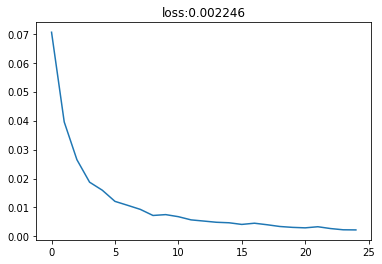

In [124]:
from keras.layers import Dropout

# Create model with dropout
model_3 = Sequential()
model_3.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(20, activation='relu'))
model_3.add(Dense(1, activation='linear'))

# Fit model with mean squared error loss function
model_3.compile(optimizer='adam', loss='mse')
history = model_3.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

In [125]:
# Make predictions from the 3 neural net models
train_pred1 = model_1.predict(scaled_train_features)
test_pred1 = model_1.predict(scaled_test_features)

train_pred2 = model_2.predict(scaled_train_features)
test_pred2 = model_2.predict(scaled_test_features)

train_pred3 = model_3.predict(scaled_train_features)
test_pred3 = model_3.predict(scaled_test_features)

# Horizontally stack predictions and take the average across rows
train_preds = np.mean(np.hstack((train_pred1, train_pred2, train_pred3)), axis=1)
test_preds = np.mean(np.hstack((test_pred1,test_pred2, test_pred3)), axis=1)
print(test_preds[-5:])

[-0.15144242 -0.00153904  0.12793952  0.16118103  0.14926855]


-0.15268320595141338
-6.060694052922997


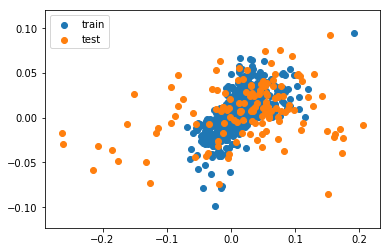

In [126]:
from sklearn.metrics import r2_score

# Evaluate the R^2 scores
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')
plt.legend(); plt.show()

### Results Summary DF

In [127]:
Models= ['Linear Regression','Lasso','Ridge','Elastic Net','PLS','PCA','Decision Tree','Random Forest','GBR','KNN','NN1','NN2','NN3']
df_results = pd.DataFrame({"Training":'', 
                         "Test":''},index=Models)


In [128]:
Models= ['Linear Regression','Lasso','Ridge','Elastic Net','PLS','PCA','Decision Tree','Random Forest','GBR','KNN','NN1','NN2','NN3']
rmse_results = pd.DataFrame({"Training":[np.sqrt(mean_squared_error(train_targets, train_predictions))], 
          "Test":[np.sqrt(mean_squared_error(test_targets, test_predictions))]},index=Models)


In [129]:
from sklearn.linear_model import LinearRegression
# scikit-learn:
scaler = StandardScaler()

scaled_train_features = scaler.fit_transform(train_features)
scaled_test_features = scaler.fit_transform(test_features)


lr = LinearRegression()
lr.fit(scaled_train_features, train_targets)

# Make predictions with our model
train_predictions = lr.predict(scaled_train_features)
test_predictions = lr.predict(scaled_test_features)



train_score = r2_score(train_targets, train_predictions)
score = r2_score(test_targets, test_predictions)

rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_predictions))

df_results.loc['Linear Regression']['Training']=train_score
df_results.loc['Linear Regression']['Test']=score
rmse_results.loc['Linear Regression']['Training']=train_rmse
rmse_results.loc['Linear Regression']['Test']=rmse

In [130]:
from sklearn.linear_model import Lasso
la = Lasso(alpha=0.01)
# Fit it to the standardized training data
la.fit(scaled_train_features, train_targets)
pred = la.predict(test_features)
train_pred= la.predict(train_features)

train_score = r2_score(train_targets, train_pred)
score = r2_score(test_targets, pred)
rmse = np.sqrt(mean_squared_error(test_targets, pred))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_pred))

df_results.loc['Lasso']['Training']=train_score
df_results.loc['Lasso']['Test']=score
rmse_results.loc['Lasso']['Training']=train_rmse
rmse_results.loc['Lasso']['Test']=rmse

In [131]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=5, normalize=True)

ridgeReg.fit(train_features, train_targets)

pred = ridgeReg.predict(test_features)
train_pred= ridgeReg.predict(train_features)

train_score = r2_score(train_targets, train_pred)
score = r2_score(test_targets, pred)
rmse = np.sqrt(mean_squared_error(test_targets, pred))
train_rmse = np.sqrt(mean_squared_error(train_targets, train_pred))
               
df_results.loc['Ridge']['Training']=train_score
df_results.loc['Ridge']['Test']=score
rmse_results.loc['Ridge']['Training']=train_rmse
rmse_results.loc['Ridge']['Test']=rmse



In [132]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=1, l1_ratio=1, normalize=True)

ENreg.fit(train_features,train_targets)

test_predictions = ENreg.predict(test_features)
train_predictions= ENreg.predict(train_features)

train_score = r2_score(train_targets, train_predictions)
score = r2_score(test_targets, test_predictions)

rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_predictions))
df_results.loc['Elastic Net']['Training']=train_score
df_results.loc['Elastic Net']['Test']=score
rmse_results.loc['Elastic Net']['Training']=train_rmse
rmse_results.loc['Elastic Net']['Test']=rmse

In [133]:
#S basic codePython
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define PLS object
pls = PLSRegression(n_components=1,scale=True)

# Fit
pls.fit(train_features, train_targets)

# Prediction
train_predicitions = pls.predict(train_features)
test_predicitions = pls.predict(test_features)
rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_predictions))

df_results.loc['PLS']['Training']=train_score
df_results.loc['PLS']['Test']=score
rmse_results.loc['PLS']['Training']=train_rmse
rmse_results.loc['PLS']['Test']=rmse

In [134]:
from sklearn.decomposition import PCA
X=train_features
X_test=test_features
X = scale(X)
X_test=scale(X_test)

# Reduce dimensions based off variance curve
pca = PCA(n_components=8)
pca.fit(X)
X1=pca.fit_transform(X)
X1_test=pca.fit_transform(X_test)

y = train_targets
lr.fit(X1,y)
pred=lr.predict(X1)
y_pred=lr.predict(X1_test)


train_score = r2_score(train_targets, pred)
score = r2_score(test_targets, y_pred)
rmse = np.sqrt(mean_squared_error(test_targets, y_pred))
train_rmse=np.sqrt(mean_squared_error(train_targets, pred))

df_results.loc['PCA']['Training']=train_score
df_results.loc['PCA']['Test']=score
rmse_results.loc['PCA']['Training']=train_rmse
rmse_results.loc['PCA']['Test']=rmse

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [135]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor(max_depth=3,random_state=42)

# Fit the model to the training features and targets
decision_tree.fit(train_features, train_targets)

train_predictions = decision_tree.predict(train_features)
test_predictions = decision_tree.predict(test_features)

train_score = r2_score(train_targets, train_predictions)
score = r2_score(test_targets, test_predictions)
rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_predictions))

df_results.loc['Decision Tree']['Training']=train_score
df_results.loc['Decision Tree']['Test']=score
rmse_results.loc['Decision Tree']['Training']=train_rmse
rmse_results.loc['Decision Tree']['Test']=rmse

In [136]:
from sklearn.ensemble import RandomForestRegressor
#Fit model
rfr = RandomForestRegressor(n_estimators=200,max_features=4,max_depth=3,random_state=42)
rfr.fit(train_features, train_targets)

#Predict test data
train_predictions = rfr.predict(train_features)
test_predictions = rfr.predict(test_features)

#Measure performance
train_score = r2_score(train_targets, train_predictions)
score = r2_score(test_targets, test_predictions)
rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_predictions))

df_results.loc['Random Forest']['Training']=train_score
df_results.loc['Random Forest']['Test']=score
rmse_results.loc['Random Forest']['Training']=train_rmse
rmse_results.loc['Random Forest']['Test']=rmse

In [137]:
from sklearn.ensemble import GradientBoostingRegressor

# Create GB model -- hyperparameters have already been searched for you
gbr = GradientBoostingRegressor(max_features=3,
                                learning_rate=0.01,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=42)

gbr.fit(train_features,train_targets)

train_score=(gbr.score(train_features, train_targets))
test_score=(gbr.score(test_features,test_targets))

rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_predictions))

df_results.loc['GBR']['Training']=train_score
df_results.loc['GBR']['Test']=score
rmse_results.loc['GBR']['Training']=train_rmse
rmse_results.loc['GBR']['Test']=rmse

In [138]:
from sklearn.neighbors import KNeighborsRegressor 

knn = KNeighborsRegressor(n_neighbors=3)
    
# Fit the model to the training data
knn.fit(scaled_train_features, train_targets)

# Get predictions for train and test sets
train_predictions = knn.predict(scaled_train_features)
test_predictions = knn.predict(scaled_test_features)

train_score = r2_score(train_targets, train_predictions)
score = r2_score(test_targets, test_predictions)
rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_predictions))

df_results.loc['KNN']['Training']=train_score
df_results.loc['KNN']['Test']=score
rmse_results.loc['KNN']['Training']=train_rmse
rmse_results.loc['KNN']['Test']=rmse
    

In [139]:
from keras.models import Sequential
from keras.layers import Dense

# Create the model
model_1 = Sequential()
model_1.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(1, activation='linear'))

# Fit the model
model_1.compile(optimizer='adam', loss='mse')
history = model_1.fit(scaled_train_features, train_targets, epochs=25)


train_preds = model_1.predict(scaled_train_features)
test_preds = model_1.predict(scaled_test_features)
rmse = np.sqrt(mean_squared_error(test_targets, test_preds))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_preds))



df_results.loc['NN1']['Train']=(r2_score(train_targets, train_preds))
df_results.loc['NN1']['Test']=(r2_score(test_targets, test_preds))

rmse_results.loc['NN1']['Training']=train_rmse
rmse_results.loc['NN1']['Test']=rmse


Epoch 1/25
555/555 [==============================] - 0s 383us/step - loss: 0.1112
Epoch 2/25
555/555 [==============================] - 0s 22us/step - loss: 0.0210
Epoch 3/25
555/555 [==============================] - 0s 22us/step - loss: 0.0102
Epoch 4/25
555/555 [==============================] - 0s 21us/step - loss: 0.0063
Epoch 5/25
555/555 [==============================] - 0s 22us/step - loss: 0.0051
Epoch 6/25
555/555 [==============================] - 0s 30us/step - loss: 0.0044
Epoch 7/25
555/555 [==============================] - 0s 24us/step - loss: 0.0035
Epoch 8/25
555/555 [==============================] - 0s 23us/step - loss: 0.0031
Epoch 9/25
555/555 [==============================] - 0s 23us/step - loss: 0.0026
Epoch 10/25
555/555 [==============================] - 0s 30us/step - loss: 0.0026
Epoch 11/25
555/555 [==============================] - 0s 27us/step - loss: 0.0022
Epoch 12/25
555/555 [==============================] - 0s 21us/step - loss: 0.0018
Epoch 13/25


In [140]:
import keras.losses
import tensorflow as tf

# Create loss function
def sign_penalty(y_true, y_pred):
    penalty = 100.
    loss = tf.where(tf.less(y_true * y_pred, 0), \
                     penalty * tf.square(y_true - y_pred), \
                     tf.square(y_true - y_pred))

    return tf.reduce_mean(loss, axis=-1)

keras.losses.sign_penalty = sign_penalty  # enable use of loss with keras
print(keras.losses.sign_penalty)

# Create the model
model_2 = Sequential()
model_2.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_2.add(Dense(20, activation='relu'))
model_2.add(Dense(1, activation='linear'))

# Fit the model with our custom 'sign_penalty' loss function
model_2.compile(optimizer='adam', loss=sign_penalty)
history = model_2.fit(scaled_train_features, train_targets, epochs=25)





train_preds = model_2.predict(scaled_train_features)
test_preds = model_2.predict(scaled_test_features)

rmse = np.sqrt(mean_squared_error(test_targets, test_preds))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_preds))



df_results.loc['NN2']['Train']=(r2_score(train_targets, train_preds))
df_results.loc['NN2']['Test']=(r2_score(test_targets, test_preds))

rmse_results.loc['NN2']['Training']=train_rmse
rmse_results.loc['NN2']['Test']=rmse


<function sign_penalty at 0x1c436999d8>
Epoch 1/25
555/555 [==============================] - 0s 451us/step - loss: 3.3660
Epoch 2/25
555/555 [==============================] - 0s 29us/step - loss: 0.6677
Epoch 3/25
555/555 [==============================] - 0s 26us/step - loss: 0.3091
Epoch 4/25
555/555 [==============================] - 0s 24us/step - loss: 0.2392
Epoch 5/25
555/555 [==============================] - 0s 23us/step - loss: 0.1803
Epoch 6/25
555/555 [==============================] - 0s 23us/step - loss: 0.1512
Epoch 7/25
555/555 [==============================] - 0s 23us/step - loss: 0.1203
Epoch 8/25
555/555 [==============================] - 0s 29us/step - loss: 0.0939
Epoch 9/25
555/555 [==============================] - 0s 27us/step - loss: 0.0841
Epoch 10/25
555/555 [==============================] - 0s 25us/step - loss: 0.0814
Epoch 11/25
555/555 [==============================] - 0s 23us/step - loss: 0.0634
Epoch 12/25
555/555 [==============================] - 

In [141]:
from keras.layers import Dropout
# Create model with dropout
model_3 = Sequential()
model_3.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(20, activation='relu'))
model_3.add(Dense(1, activation='linear'))

# Fit model with mean squared error loss function
model_3.compile(optimizer='adam', loss='mse')
history = model_3.fit(scaled_train_features, train_targets, epochs=25)

train_preds = model_3.predict(scaled_train_features)
test_preds = model_3.predict(scaled_test_features)
rmse = np.sqrt(mean_squared_error(test_targets, test_preds))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_preds))



df_results.loc['NN3']['Train']=(r2_score(train_targets, train_preds))
df_results.loc['NN3']['Test']=(r2_score(test_targets, test_preds))

rmse_results.loc['NN3']['Training']=train_rmse
rmse_results.loc['NN3']['Test']=rmse


Epoch 1/25
555/555 [==============================] - 0s 520us/step - loss: 0.0696
Epoch 2/25
555/555 [==============================] - 0s 25us/step - loss: 0.0238
Epoch 3/25
555/555 [==============================] - 0s 24us/step - loss: 0.0096
Epoch 4/25
555/555 [==============================] - 0s 28us/step - loss: 0.0054
Epoch 5/25
555/555 [==============================] - 0s 27us/step - loss: 0.0049
Epoch 6/25
555/555 [==============================] - 0s 27us/step - loss: 0.0038
Epoch 7/25
555/555 [==============================] - 0s 25us/step - loss: 0.0034
Epoch 8/25
555/555 [==============================] - 0s 32us/step - loss: 0.0024
Epoch 9/25
555/555 [==============================] - 0s 31us/step - loss: 0.0023
Epoch 10/25
555/555 [==============================] - 0s 29us/step - loss: 0.0016
Epoch 11/25
555/555 [==============================] - 0s 27us/step - loss: 0.0014
Epoch 12/25
555/555 [==============================] - 0s 27us/step - loss: 0.0013
Epoch 13/25


### Results Summary DF

In [182]:
Models= ['Linear Regression','Lasso','Ridge','Elastic Net','PLS','PCA','Decision Tree','Random Forest','GBR','KNN','NN1','NN2','NN3']
df_results = pd.DataFrame({"Training":'', 
                         "Test":''},index=Models)


In [183]:
Models= ['Linear Regression','Lasso','Ridge','Elastic Net','PLS','PCA','Decision Tree','Random Forest','GBR','KNN','NN1','NN2','NN3']
rmse_results = pd.DataFrame({"Training":[np.sqrt(mean_squared_error(train_targets, train_predictions))], 
          "Test":[np.sqrt(mean_squared_error(test_targets, test_predictions))]},index=Models)


In [184]:
from sklearn.linear_model import LinearRegression
# scikit-learn:
scaler = StandardScaler()

scaled_train_features = scaler.fit_transform(train_features)
scaled_test_features = scaler.fit_transform(test_features)


lr = LinearRegression()
lr.fit(scaled_train_features, train_targets)

# Make predictions with our model
train_predictions = lr.predict(scaled_train_features)
test_predictions = lr.predict(scaled_test_features)



train_score = r2_score(train_targets, train_predictions)
score = r2_score(test_targets, test_predictions)

rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_predictions))

df_results.loc['Linear Regression']['Training']=train_score
df_results.loc['Linear Regression']['Test']=score
rmse_results.loc['Linear Regression']['Training']=train_rmse
rmse_results.loc['Linear Regression']['Test']=rmse

In [185]:
from sklearn.linear_model import Lasso
la = Lasso(alpha=0.01)
# Fit it to the standardized training data
la.fit(scaled_train_features, train_targets)
pred = la.predict(test_features)
train_pred= la.predict(train_features)

train_score = r2_score(train_targets, train_pred)
score = r2_score(test_targets, pred)
rmse = np.sqrt(mean_squared_error(test_targets, pred))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_pred))

df_results.loc['Lasso']['Training']=train_score
df_results.loc['Lasso']['Test']=score
rmse_results.loc['Lasso']['Training']=train_rmse
rmse_results.loc['Lasso']['Test']=rmse

In [186]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=3, normalize=True)

ridgeReg.fit(train_features, train_targets)

pred = ridgeReg.predict(test_features)
train_pred= ridgeReg.predict(train_features)

train_score = r2_score(train_targets, train_pred)
score = r2_score(test_targets, pred)
rmse = np.sqrt(mean_squared_error(test_targets, pred))
train_rmse = np.sqrt(mean_squared_error(train_targets, train_pred))
               
df_results.loc['Ridge']['Training']=train_score
df_results.loc['Ridge']['Test']=score
rmse_results.loc['Ridge']['Training']=train_rmse
rmse_results.loc['Ridge']['Test']=rmse



In [187]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=1, l1_ratio=1, normalize=True)

ENreg.fit(train_features,train_targets)

test_predictions = ENreg.predict(test_features)
train_predictions= ENreg.predict(train_features)

train_score = r2_score(train_targets, train_predictions)
score = r2_score(test_targets, test_predictions)

rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_predictions))
df_results.loc['Elastic Net']['Training']=train_score
df_results.loc['Elastic Net']['Test']=score
rmse_results.loc['Elastic Net']['Training']=train_rmse
rmse_results.loc['Elastic Net']['Test']=rmse

In [188]:
#S basic codePython
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define PLS object
pls = PLSRegression(n_components=1,scale=True)

# Fit
pls.fit(train_features, train_targets)

# Prediction
train_predicitions = pls.predict(train_features)
test_predicitions = pls.predict(test_features)
rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_predictions))

df_results.loc['PLS']['Training']=train_score
df_results.loc['PLS']['Test']=score
rmse_results.loc['PLS']['Training']=train_rmse
rmse_results.loc['PLS']['Test']=rmse

In [189]:
from sklearn.decomposition import PCA
X=train_features
X_test=test_features
X = scale(X)
X_test=scale(X_test)

# Reduce dimensions based off variance curve
pca = PCA(n_components=15)
pca.fit(X)
X1=pca.fit_transform(X)
X1_test=pca.fit_transform(X_test)

y = train_targets
lr.fit(X1,y)
pred=lr.predict(X1)
y_pred=lr.predict(X1_test)


train_score = r2_score(train_targets, pred)
score = r2_score(test_targets, y_pred)
rmse = np.sqrt(mean_squared_error(test_targets, y_pred))
train_rmse=np.sqrt(mean_squared_error(train_targets, pred))

df_results.loc['PCA']['Training']=train_score
df_results.loc['PCA']['Test']=score
rmse_results.loc['PCA']['Training']=train_rmse
rmse_results.loc['PCA']['Test']=rmse

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [190]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor(max_depth=3,random_state=42)

# Fit the model to the training features and targets
decision_tree.fit(train_features, train_targets)

train_predictions = decision_tree.predict(train_features)
test_predictions = decision_tree.predict(test_features)

train_score = r2_score(train_targets, train_predictions)
score = r2_score(test_targets, test_predictions)
rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_predictions))

df_results.loc['Decision Tree']['Training']=train_score
df_results.loc['Decision Tree']['Test']=score
rmse_results.loc['Decision Tree']['Training']=train_rmse
rmse_results.loc['Decision Tree']['Test']=rmse

In [191]:
from sklearn.ensemble import RandomForestRegressor
#Fit model
rfr = RandomForestRegressor(n_estimators=200,max_features=4,max_depth=3,random_state=42)
rfr.fit(train_features, train_targets)

#Predict test data
train_predictions = rfr.predict(train_features)
test_predictions = rfr.predict(test_features)

#Measure performance
train_score = r2_score(train_targets, train_predictions)
score = r2_score(test_targets, test_predictions)
rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_predictions))

df_results.loc['Random Forest']['Training']=train_score
df_results.loc['Random Forest']['Test']=score
rmse_results.loc['Random Forest']['Training']=train_rmse
rmse_results.loc['Random Forest']['Test']=rmse

In [192]:
from sklearn.ensemble import GradientBoostingRegressor

# Create GB model -- hyperparameters have already been searched for you
gbr = GradientBoostingRegressor(max_features=3,
                                learning_rate=0.01,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=42)

gbr.fit(train_features,train_targets)
train_predictions = gbr.predict(train_features)
test_predictions = gbr.predict(test_features)


train_score = r2_score(train_targets, train_predictions)
score = r2_score(test_targets, test_predictions)

rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_predictions))

df_results.loc['GBR']['Training']=train_score
df_results.loc['GBR']['Test']=score
rmse_results.loc['GBR']['Training']=train_rmse
rmse_results.loc['GBR']['Test']=rmse

In [193]:
from sklearn.neighbors import KNeighborsRegressor 

knn = KNeighborsRegressor(n_neighbors=3)
    
# Fit the model to the training data
knn.fit(scaled_train_features, train_targets)

# Get predictions for train and test sets
train_predictions = knn.predict(scaled_train_features)
test_predictions = knn.predict(scaled_test_features)

train_score = r2_score(train_targets, train_predictions)
score = r2_score(test_targets, test_predictions)
rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_predictions))

df_results.loc['KNN']['Training']=train_score
df_results.loc['KNN']['Test']=score
rmse_results.loc['KNN']['Training']=train_rmse
rmse_results.loc['KNN']['Test']=rmse
    

In [194]:
from keras.models import Sequential
from keras.layers import Dense

# Create the model
model_1 = Sequential()
model_1.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(1, activation='linear'))

# Fit the model
model_1.compile(optimizer='adam', loss='mse')
history = model_1.fit(scaled_train_features, train_targets, epochs=25)


train_preds = model_1.predict(scaled_train_features)
test_preds = model_1.predict(scaled_test_features)
rmse = np.sqrt(mean_squared_error(test_targets, test_preds))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_preds))



df_results.loc['NN1']['Train']=(r2_score(train_targets, train_preds))
df_results.loc['NN1']['Test']=(r2_score(test_targets, test_preds))

rmse_results.loc['NN1']['Training']=train_rmse
rmse_results.loc['NN1']['Test']=rmse


Epoch 1/25
555/555 [==============================] - 1s 1ms/step - loss: 0.4127
Epoch 2/25
555/555 [==============================] - 0s 27us/step - loss: 0.0396
Epoch 3/25
555/555 [==============================] - 0s 26us/step - loss: 0.0139
Epoch 4/25
555/555 [==============================] - 0s 28us/step - loss: 0.0064
Epoch 5/25
555/555 [==============================] - 0s 34us/step - loss: 0.0045
Epoch 6/25
555/555 [==============================] - 0s 26us/step - loss: 0.0037
Epoch 7/25
555/555 [==============================] - 0s 26us/step - loss: 0.0030
Epoch 8/25
555/555 [==============================] - 0s 43us/step - loss: 0.0026
Epoch 9/25
555/555 [==============================] - 0s 31us/step - loss: 0.0022
Epoch 10/25
555/555 [==============================] - 0s 27us/step - loss: 0.0020
Epoch 11/25
555/555 [==============================] - 0s 34us/step - loss: 0.0018
Epoch 12/25
555/555 [==============================] - 0s 32us/step - loss: 0.0017
Epoch 13/25
55

In [195]:
import keras.losses
import tensorflow as tf

# Create loss function
def sign_penalty(y_true, y_pred):
    penalty = 100.
    loss = tf.where(tf.less(y_true * y_pred, 0), \
                     penalty * tf.square(y_true - y_pred), \
                     tf.square(y_true - y_pred))

    return tf.reduce_mean(loss, axis=-1)

keras.losses.sign_penalty = sign_penalty  # enable use of loss with keras
print(keras.losses.sign_penalty)

# Create the model
model_2 = Sequential()
model_2.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_2.add(Dense(20, activation='relu'))
model_2.add(Dense(1, activation='linear'))

# Fit the model with our custom 'sign_penalty' loss function
model_2.compile(optimizer='adam', loss=sign_penalty)
history = model_2.fit(scaled_train_features, train_targets, epochs=25)





train_preds = model_2.predict(scaled_train_features)
test_preds = model_2.predict(scaled_test_features)

rmse = np.sqrt(mean_squared_error(test_targets, test_preds))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_preds))



df_results.loc['NN2']['Train']=(r2_score(train_targets, train_preds))
df_results.loc['NN2']['Test']=(r2_score(test_targets, test_preds))

rmse_results.loc['NN2']['Training']=train_rmse
rmse_results.loc['NN2']['Test']=rmse


<function sign_penalty at 0x1c483c97b8>
Epoch 1/25
555/555 [==============================] - 1s 1ms/step - loss: 4.1067
Epoch 2/25
555/555 [==============================] - 0s 27us/step - loss: 0.7361
Epoch 3/25
555/555 [==============================] - 0s 31us/step - loss: 0.3597
Epoch 4/25
555/555 [==============================] - 0s 35us/step - loss: 0.2167
Epoch 5/25
555/555 [==============================] - 0s 32us/step - loss: 0.1514
Epoch 6/25
555/555 [==============================] - 0s 31us/step - loss: 0.1070
Epoch 7/25
555/555 [==============================] - 0s 28us/step - loss: 0.0867
Epoch 8/25
555/555 [==============================] - 0s 38us/step - loss: 0.0770
Epoch 9/25
555/555 [==============================] - 0s 30us/step - loss: 0.0551
Epoch 10/25
555/555 [==============================] - 0s 29us/step - loss: 0.0538
Epoch 11/25
555/555 [==============================] - 0s 37us/step - loss: 0.0544
Epoch 12/25
555/555 [==============================] - 0s

In [196]:
from keras.layers import Dropout
# Create model with dropout
model_3 = Sequential()
model_3.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(20, activation='relu'))
model_3.add(Dense(1, activation='linear'))

# Fit model with mean squared error loss function
model_3.compile(optimizer='adam', loss='mse')
history = model_3.fit(scaled_train_features, train_targets, epochs=25)

train_preds = model_3.predict(scaled_train_features)
test_preds = model_3.predict(scaled_test_features)
rmse = np.sqrt(mean_squared_error(test_targets, test_preds))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_preds))



df_results.loc['NN3']['Train']=(r2_score(train_targets, train_preds))
df_results.loc['NN3']['Test']=(r2_score(test_targets, test_preds))

rmse_results.loc['NN3']['Training']=train_rmse
rmse_results.loc['NN3']['Test']=rmse


Epoch 1/25
555/555 [==============================] - 1s 1ms/step - loss: 0.1532
Epoch 2/25
555/555 [==============================] - 0s 31us/step - loss: 0.0386
Epoch 3/25
555/555 [==============================] - 0s 33us/step - loss: 0.0253
Epoch 4/25
555/555 [==============================] - 0s 47us/step - loss: 0.0197
Epoch 5/25
555/555 [==============================] - 0s 35us/step - loss: 0.0162
Epoch 6/25
555/555 [==============================] - 0s 40us/step - loss: 0.0127
Epoch 7/25
555/555 [==============================] - 0s 46us/step - loss: 0.0096
Epoch 8/25
555/555 [==============================] - 0s 38us/step - loss: 0.0079
Epoch 9/25
555/555 [==============================] - 0s 41us/step - loss: 0.0071
Epoch 10/25
555/555 [==============================] - 0s 43us/step - loss: 0.0059
Epoch 11/25
555/555 [==============================] - 0s 41us/step - loss: 0.0037
Epoch 12/25
555/555 [==============================] - 0s 37us/step - loss: 0.0032
Epoch 13/25
55

In [197]:
df_results.round(3)

,Training,Test
Linear Regression,0.290672,-9.63369
Lasso,0,-0.00210831
Ridge,0.102427,0.039341
Elastic Net,0,-0.00210831
PLS,0,-0.00210831
PCA,0.182135,0.0223306
Decision Tree,0.275308,-0.109345
Random Forest,0.311398,-0.14289
GBR,0.403531,-0.174223
KNN,0.655399,0.0347871


Text(0.5,1,'Microsoft R Squared 5 Day Model Performance')

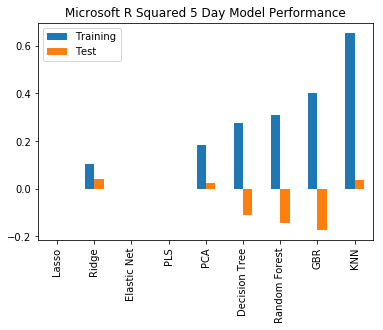

In [201]:
df_results=df_results.drop(['Linear Regression'])
df_results.iloc[:-3:].plot(kind='bar')
plt.title('Microsoft R Squared 5 Day Model Performance')

In [199]:
rmse_results.round(4)

,Training,Test
Linear Regression,0.0195,0.1017
Lasso,0.0232,0.0312
Ridge,0.0219,0.0306
Elastic Net,0.0232,0.0312
PLS,0.0232,0.0312
PCA,0.0209,0.0309
Decision Tree,0.0197,0.0329
Random Forest,0.0192,0.0334
GBR,0.0179,0.0338
KNN,0.0136,0.0307


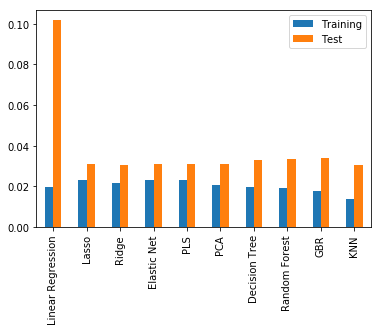

In [200]:
rmse_results.round(4).iloc[:-3:].plot(kind='bar')